### Étude de la complexité des algorithmes de tri - BEAUJARD Traïan

## Sommaire

- [I/Introduction](#I/Introduction)
    - [Complexité en temps](#Complexité-en-temps)
    - [Complexité en espace](#Complexité-en-espace)
    - [Cas meilleurs, pires et moyens](#Cas-meilleurs,-pires-et-moyens)
    - [Présentation du projet](#Présentation-du-projet)
- [II/Analyse des algorithmes](#II/Analyse-des-algorithmes)
    - [Bubble Sort](#Bubble-Sort)
    - [Selection Sort](#Selection-Sort)
    - [Insertion Sort](#Insertion-Sort)
    - [Heap Sort](#Heap-Sort)
    - [Quick Sort](#Quick-Sort)
    - [Merge Sort](#Merge-Sort)

- [III/Comparaison des algorithmes](#III/Comparaison-des-algorithmes)
    - [Récap](#Récap)
    - [Listes triées](#a/Listes-triées)
    - [Listes inversées](#b/Listes-inversées)
    - [Listes aléatoires](#c/Listes-aléatoires)
    - [Résumé des résultats](#Résumé-des-résulats)
    - [Conlusion des résulats](#Conclusion-des-résultats)
- [IV/Bonnes pratiques](#section-1-introduction)

# I/Introduction

La **complexité algorithmique** est une mesure de la performance d'un algorithme, exprimée en fonction de la taille de l'entrée.
<br> → Elle permet d'évaluer le **temps** (ou le nombre d'opérations) nécessaire pour exécuter un algorithme donné. 

## Complexité en temps

La **complexité en temps** mesure le nombre d'opérations élémentaires que l'algorithme doit effectuer en fonction de la taille de l'entrée. Elle est généralement exprimée en **notation Big-O** (O), qui décrit le comportement asymptotique de l'algorithme lorsque la taille des données tend vers l'infini.

Voici différentes complexités :

- **O(1)** : Complexité constante — le temps d'exécution ne dépend pas de la taille des données.
- **O(log n)** : Complexité logarithmique — le temps d'exécution croît logarithmiquement avec la taille des données.
- **O(n)** : Complexité linéaire — le temps d'exécution croît linéairement avec la taille des données.
- **O(n log n)** : Complexité linéarithmique — le temps d'exécution croît proportionnellement à la taille des données multipliée par le logarithme de cette taille.
- **O(n²)** : Complexité quadratique — le temps d'exécution croît proportionnellement au carré de la taille des données.
- **O(2^n)** : Complexité exponentielle — le temps d'exécution double à chaque ajout d'élément dans l'entrée.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Ts35ZjbtSlZ95vMc1gsVTA.jpeg" alt="graph_complexity" width="400" /> [source de l'image](https://sumeetpanchal-21.medium.com/exploring-java-code-samples-understanding-time-complexity-and-outputs-cad12e57ac4b)


## Complexité en espace

La **complexité en espace** fait référence à la quantité de mémoire supplémentaire utilisée par l'algorithme par rapport à la taille de l'entrée. 

## Cas meilleurs, pires et moyens

Chaque algorithme peut avoir trois scénarios de performances en fonction de la structure des données d'entrée :
- **Meilleur cas** : → un temps d'exécution minimal.
- **Pire cas** : → temps d'exécution maximal.
- **Cas moyen** : → la performance moyenne de l'algorithme sur un grand nombre d'exécutions avec des données d'entrée différentes.

## Présentation du projet

La complexité permet de **comparer différents algorithmes** et d'en choisir un qui est le plus adapté à un contexte donné.
Nous allons comparer ces différentes complexités et les performances de 6 algorithmes de tri sur différents types de tableaux.

Voici le diagramme UML du projet :
<img src="https://stein-ind.fr/traian/media/python_project_uml.png" alt="uml_project" />

Le centre du projet est la classe SortBenchmark qui permet de mesurer le temps d'exécution, le nombre d'opérations, et la mémoire utilisée pour les algorithmes spécifiés.

Benchmark 1 / 1
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


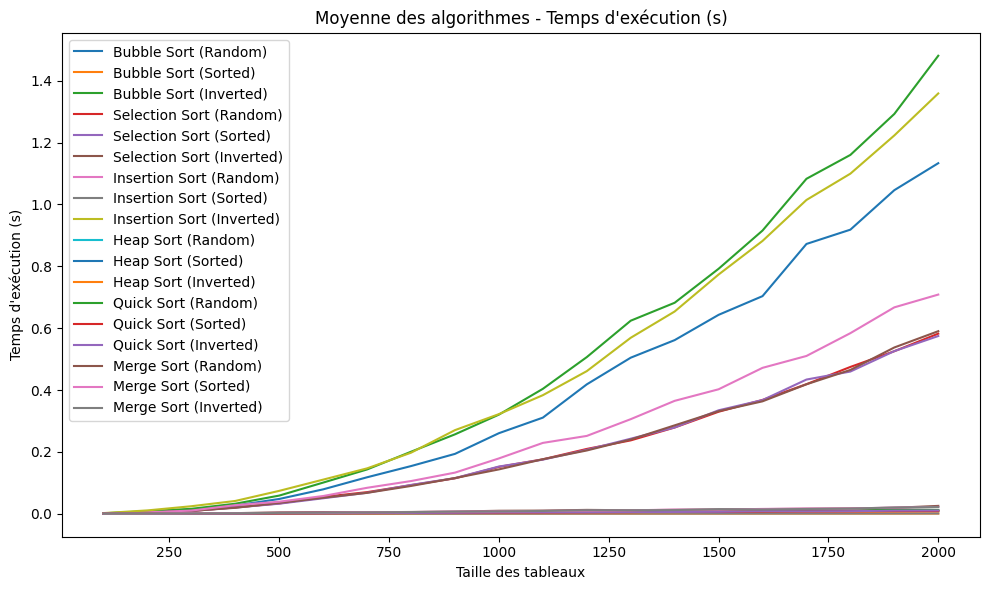

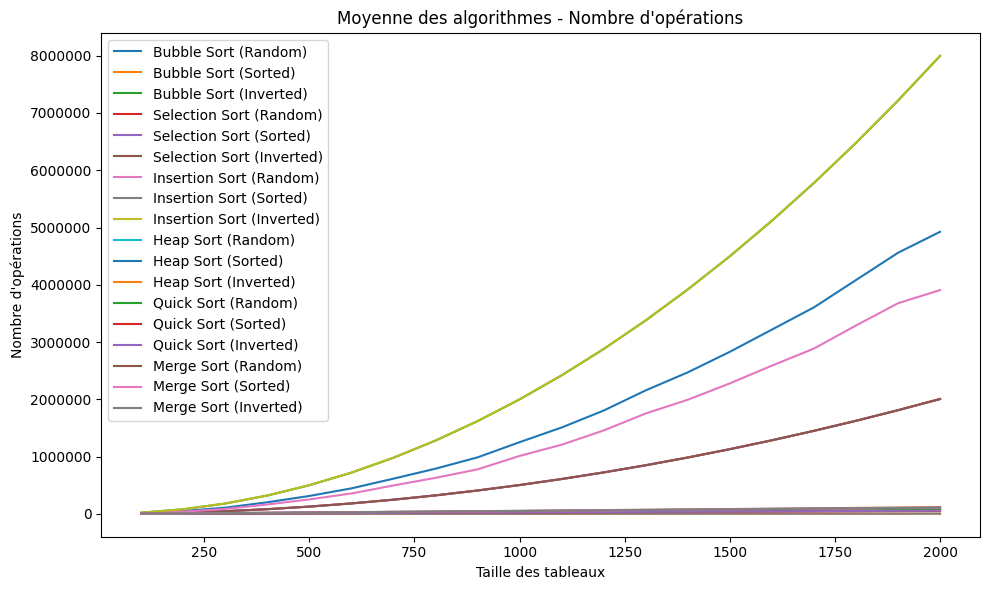

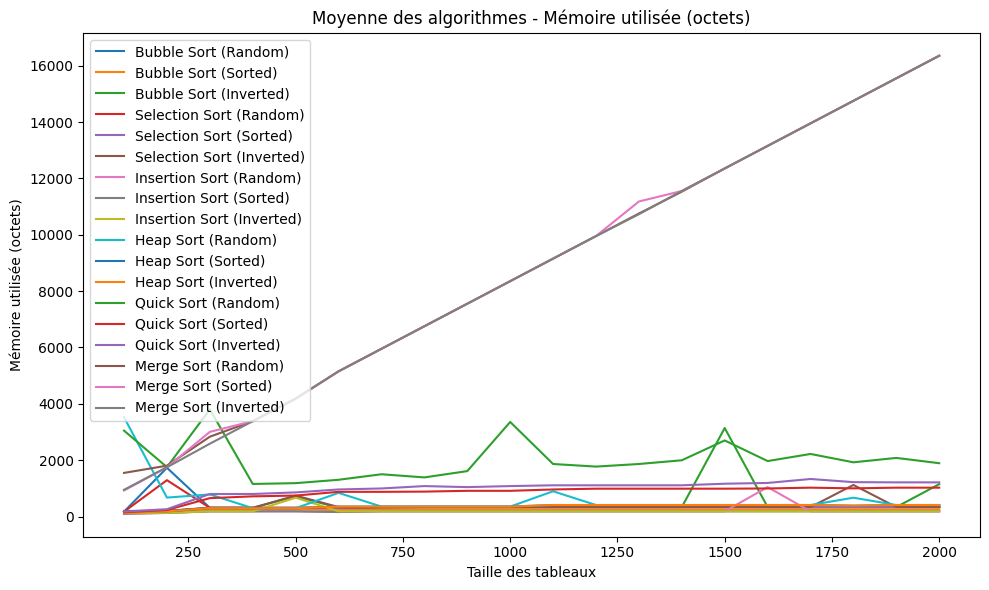

In [1]:
from projet_BEAUJARD_Traian import *

algorithms=[
    BubbleSort(), 
    SelectionSort(), 
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['random', 'sorted', 'inverted'], 
    n_runs=5, 
    show_plots=True)

benchmark.run()

dont les paramètres sont :
- `algorithms` : Une liste d'algorithmes parmi : Bubble Sort, Selection Sort, Insertion Sort, Heap Sort, Quick Sort, Merge Sort.
- `nlist` : Nombre de listes à trier (croissant de `nval` par liste).
- `types_to_sort` : Types de listes à trier (par exemple, ordonnées, inversées, aléatoires).
- `n_runs` : Nombre de fois que l'on souhaite exécuter le benchmark pour obtenir des moyennes fiables.
- `show_plots` : Décide si l'on affiche (`True`) ou sauvegarde (`False`) les graphiques générés.

Le code va afficher 3 graphiques avec en courbe chaque algorithme avec chacune des listes :
- Un graphique montrant la **complexité en temps** (Sur l'ordonnée on aura le nombre de secondes écoulées).*
- Un graphique montrant la **complexité en temps** mais avec le nombre d'opérations (Sur l'ordonnée on aura le nombre d'opérationd').
- Un graphique montrant la **complexité en espace** (Sur l'ordonnée on aura la mémoire utilisée). *

► * A noter que l'exécution depuis le notebook peut causer des "sauts" dans les graphiques des valeurs de mémoire utilisée ou sur le temps d'exécution (moins fréquent). Je n'ai pas trouvé comment corriger le problème, la valeur récoltée est perturbée par des process du notebook jupiter. 

# II/Analyse des algorithmes

## Bubble Sort

À chaque itération, on compare des éléments adjacents dans la liste et on échange ceux qui sont dans le mauvais ordre. Ce processus est répété jusqu'à ce que la liste soit entièrement triée. Nous utiliserons la version "optimisée" qui ajoute une condition vérifiant s'il y a eu un échange. Le cas échéant, cela veut dire que la liste est déjà triée.

- Soit un tableau $A$ de taille $n$. Pour chaque itération $i$, on compare chaque paire d'éléments adjacents $A[j]$ et $A[j+1]$ pour $j = 0$ à $n-i-1$, et on les échange si :

$$
A[j] > A[j+1]
$$

- Après chaque itération, le plus grand élément "bulle" vers la fin de la liste et la partie non triée diminue.


Implémentation :
```python
class BubbleSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Bubble Sort')

    def sort(self, data):
        n = len(data)
        operations = 0
        for i in range(n):
            swapped = False
            for j in range(0, n-i-1):
                operations += 1  # La comparaison suivante est une opération.
                if data[j] > data[j+1]:
                    data[j], data[j+1] = data[j+1], data[j]
                    operations += 3  # Interversion, 3 opérations avec variable intermédiaire.
                    swapped = True
            if not swapped:  # si aucun échange n'a été fait, la liste est déjà triée.
                break
        return data, operations
```



|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Bubble Sort     | $O(n)$      | $O(n^2)$    | $O(n^2)$      |

**Meilleur Cas : $O(n)$**

La liste est déjà triée.
- **Nombre de Comparaisons** : $n - 1$
- **Nombre d'Échanges** : 0
-
  $$
  T(n) = O(n)
  $$

**Cas Moyen : $O(n^2)$**

Les éléments sont dans un ordre aléatoire.
- L'algorithme effectue environ $ \frac{n(n - 1)}{2} $ comparaisons et échanges.
- 
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

**Pire Cas : $O(n^2)$**

La liste est triée dans l'ordre inverse.

  - Le nombre maximum de comparaisons et d'échanges est atteint.
-
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

*Exécuter le code ci-dessous pour voir le benchmark de cet algo.*

Benchmark 1 / 1
Exécution de Bubble Sort


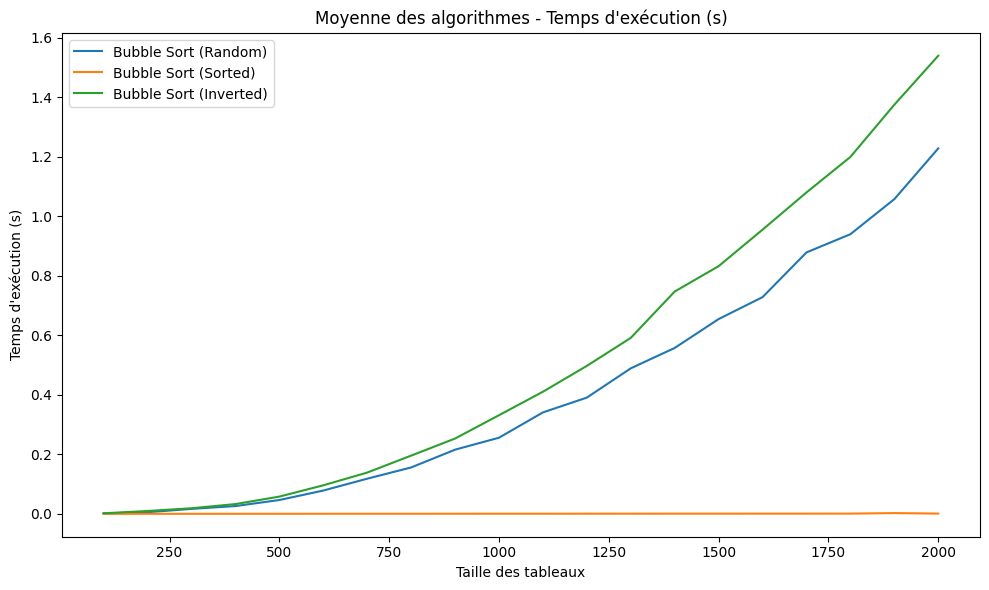

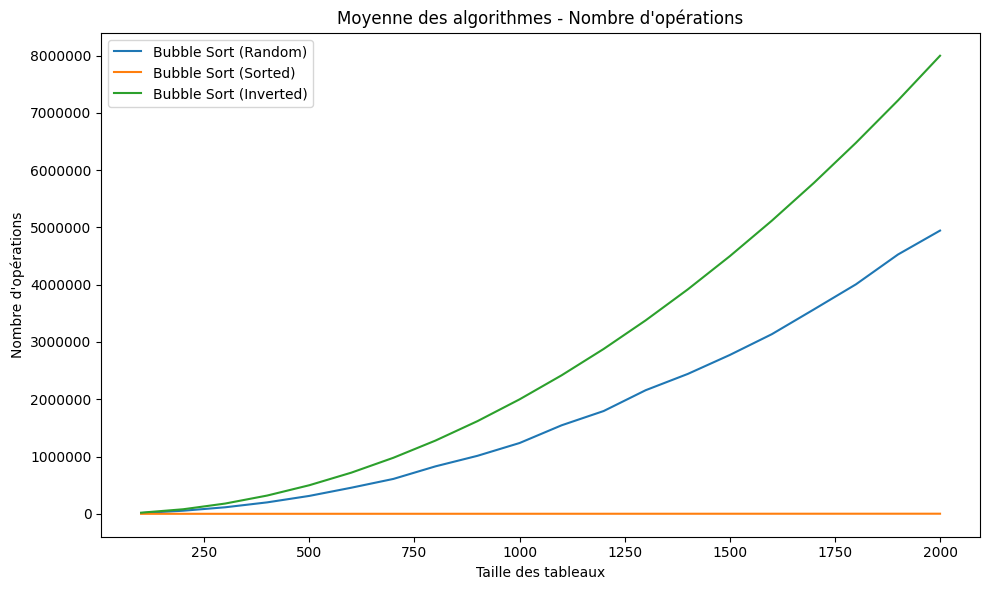

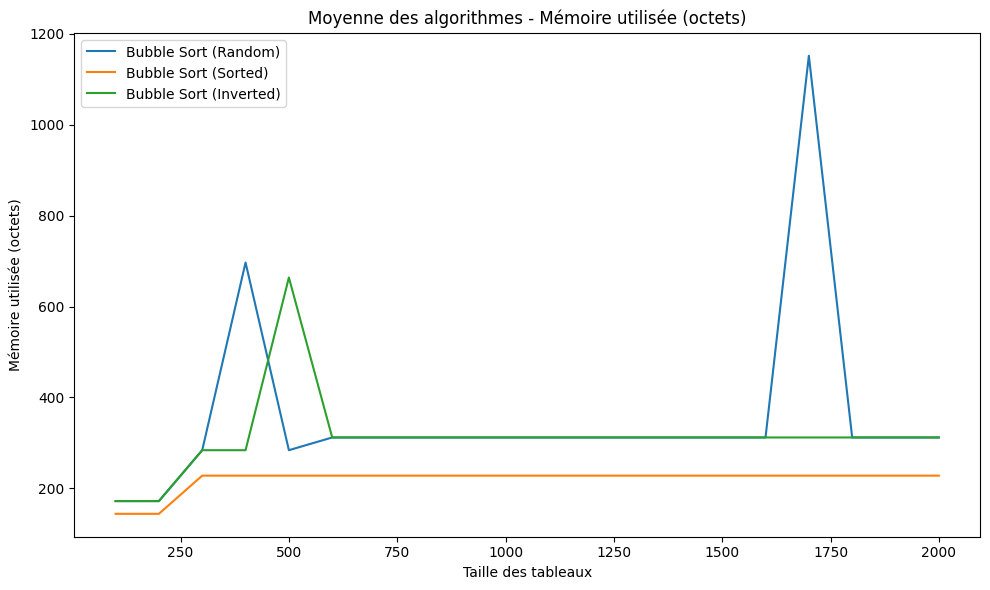

In [2]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[BubbleSort()], nlist=20, nval=100, types_to_sort=['random', 'sorted', 'inverted'], n_runs=5, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution :
    - Tableau trié (meilleur cas) : le temps est minimal, correspondant à une complexité de O(n).
    - Tableau aléatoire (cas moyen) : le temps suit une courbe quadratique, confirmant la complexité O(n²).
    - Tableau inversé (pire cas) : le temps est le plus élevé, conforme à O(n²).
    - Globalement, le temps d'exécution est très long.

- Nombre d'opérations :
    - Même tendance, avec un nombre d'opérations linéaire pour le meilleur cas, et quadratique pour les autres, validant les complexités théoriques.
    - Globalement, le nombre d'opérations effectuées est très grand.

- Mémoire utilisée :
    - Entre 300 et 350 octets total avec le programme. Faible consommation en espace, typique de **l'algorithme in-place**. C'est-à-dire qu'il trie les données directement dans le tableau d'origine sans utiliser d'espace supplémentaire significatif. La complexité en espace est de **O(1)**.

## Selection Sort

Pour chaque itération, on cherche le plus petit élément dans la partie non triée de la liste.
Une fois trouvé, on l'échange avec l'élément situé à la position courante.

- Soit un tableau \(A\) de taille \(n\), pour chaque itération \(i\) de \(0\) à \(n-1\), on trouve l'indice \(j\) tel que :

$$
A[j] = \min(A[i \dots n-1])
$$

- Ensuite, on échange
$$
A[i] \ et \ A[j].
$$

Implémentation :
```python
class SelectionSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Selection Sort')

    def sort(self, data):
        n = len(data)
        operations = 0
        for i in range(n):
            min_idx = i
            for j in range(i+1, n):
                operations += 1 # Comparaison
                if data[j] < data[min_idx]:
                    min_idx = j
            data[i], data[min_idx] = data[min_idx], data[i]
            operations += 3 # Inversion
        return data, operations
```
|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Selection Sort     | $O(n^2)$      | $O(n^2)$    | $O(n^2)$      |

**Meilleur Cas : $O(n^2)$**

Quel que soit l'ordre initial.

  - Le Selection Sort effectue toujours le même nombre de comparaisons, quelle que soit l'ordre initial de la liste.
  - **Nombre de Comparaisons** : $ \frac{n(n - 1)}{2} $
  - **Nombre d'Échanges** : $n - 1$
- 
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

**Cas Moyen et Pire Cas: $O(n^2)$**

Les éléments sont dans un ordre aléatoire ou triés.

  - Comme pour le meilleur cas, le nombre de comparaisons et d'échanges reste le même.
- 
  $$
  T(n) = O(n^2)
  $$


Benchmark 1 / 1
Exécution de Selection Sort


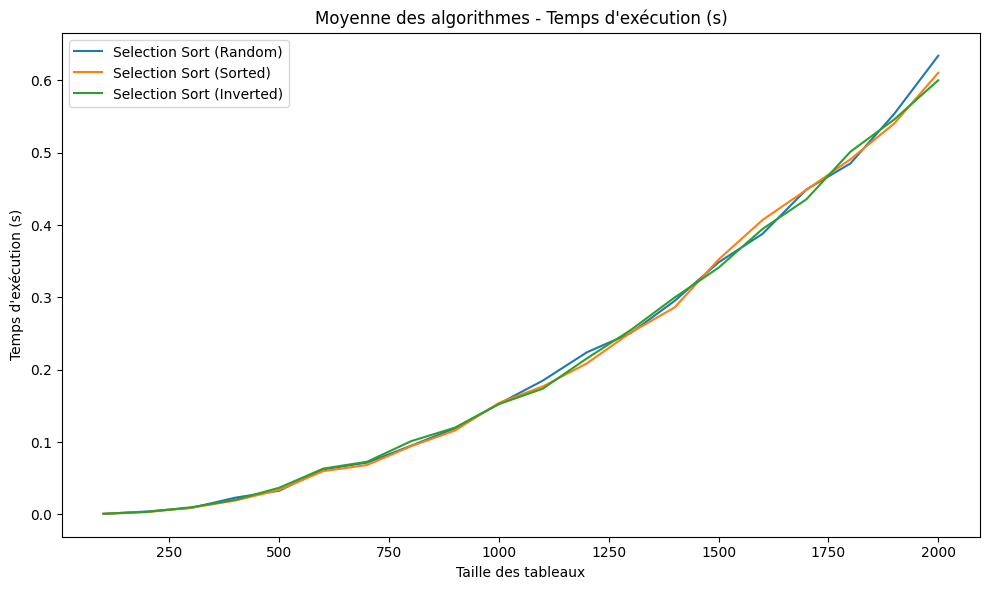

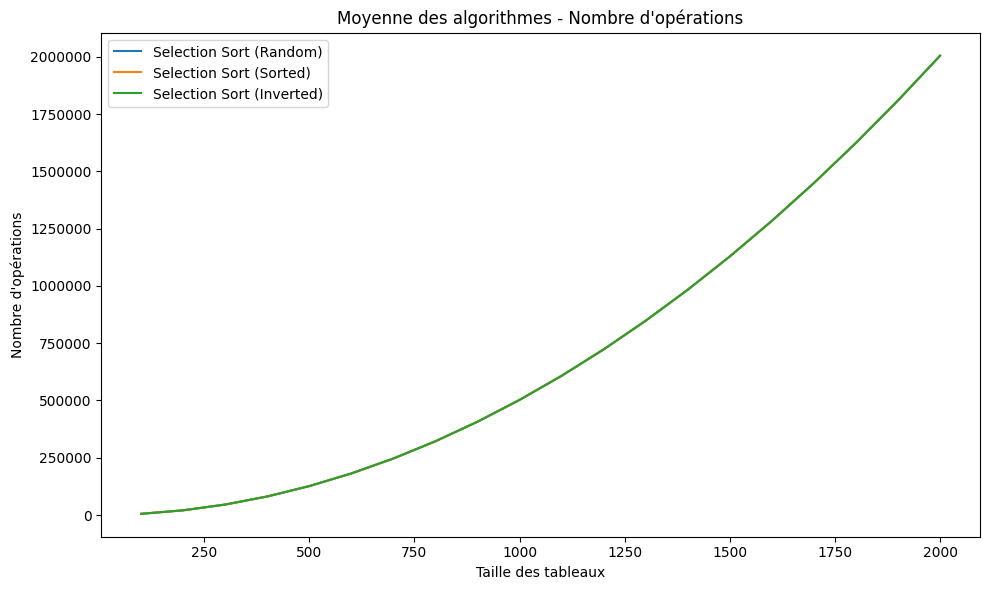

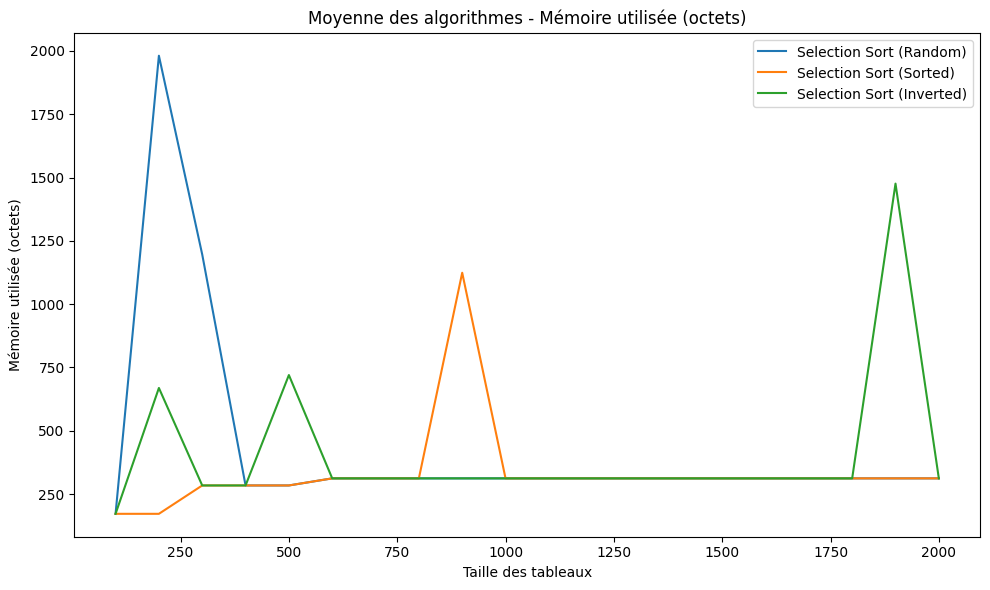

In [3]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[SelectionSort()], nlist=20, nval=100, types_to_sort=['random', 'sorted', 'inverted'], n_runs=5, show_plots=True)
benchmark.run()


Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution et Nombre d'opérations:
    - Peu importe la liste, les courbes sont identiques et quadratiques. L'algorithme fera toujours le même nombre d'opérations peu importe les listes.

- Mémoire utilisée :
    - Entre 300 et 320 octets au total avec le programme. Faible consommation en espace, typique de l'algorithme in-place. La complexité en espace est de **O(1)**.

## Insertion Sort

L'algorithme **Insertion Sort** fonctionne en construisant progressivement une sous-liste triée en prenant chaque élément de la liste et en l'insérant à sa position correcte dans cette sous-liste.

- Soit un tableau $A$ de taille $n$. Pour chaque itération $i$ (de $1$ à $n-1$), on sélectionne l'élément $A[i]$ et on le compare aux éléments de la sous-liste $A[0 \dots i-1]$.
- On insère $A[i]$ dans sa position correcte dans la sous-liste triée en décalant les éléments plus grands que $A[i]$ vers la droite.

Implémentation :
```python
class InsertionSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Insertion Sort')

    def sort(self, data):
        operations = 0
        for i in range(1, len(data)):
            key = data[i]
            j = i - 1
            operations += 1  # Initialisation de 'j'
            while j >= 0 and key < data[j]:
                operations += 2  # 2 Comparaisons
                data[j + 1] = data[j]
                operations += 1  # Déplacement de data
                j -= 1
                operations += 1  # Décrémentation de 'j'
            data[j + 1] = key
            operations += 1  # Insertion de 'key'
        return data, operations
```

### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Insertion Sort  | $O(n)$            | $O(n^2)$          | $O(n^2)$          |

**Meilleur Cas : $O(n)$**

La liste est déjà triée.

- Dans ce cas, chaque élément est comparé une seule fois avec l'élément précédent.
- **Nombre de Comparaisons** : $n - 1$
- **Nombre d'Échanges** : 0 (aucun décalage nécessaire).

  $$
  T(n) = O(n)
  $$

**Cas Moyen : $O(n^2)$**

Les éléments sont dans un ordre aléatoire.

- En moyenne, chaque élément est comparé à environ la moitié de la sous-liste triée.
- Le nombre de décalages est également proportionnel à la taille de la sous-liste.

  $$
  T(n) = O\left( \frac{n(n-1)}{4} \right) = O(n^2)
  $$

**Pire Cas : $O(n^2)$**

La liste est triée dans l'ordre inverse.

- Chaque élément est comparé à tous les éléments de la sous-liste triée.
- Le nombre maximum de décalages est atteint pour chaque insertion.

  $$
  T(n) = O\left( \frac{n(n-1)}{2} \right) = O(n^2)
  $$


Benchmark 1 / 1
Exécution de Insertion Sort


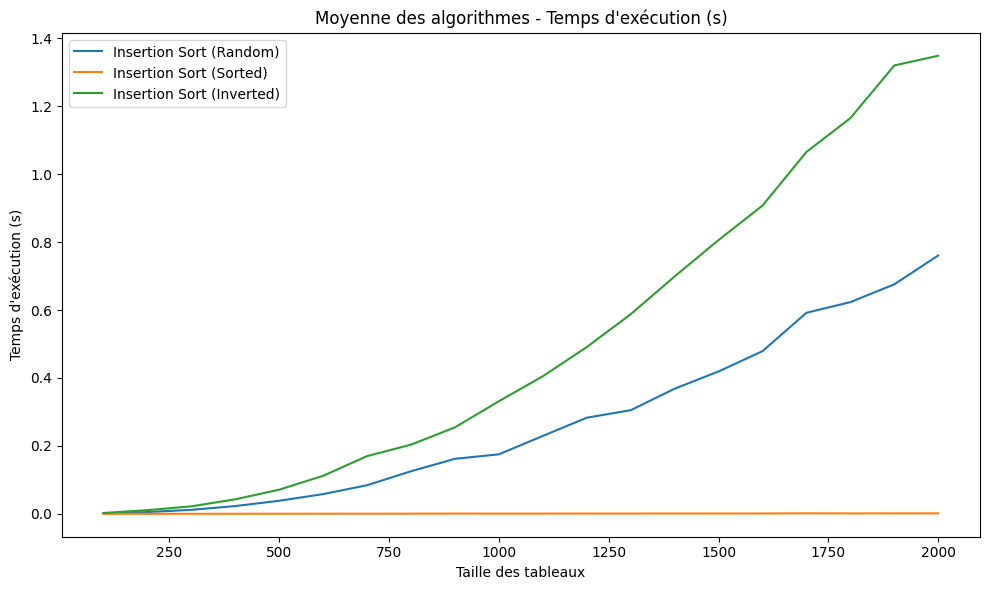

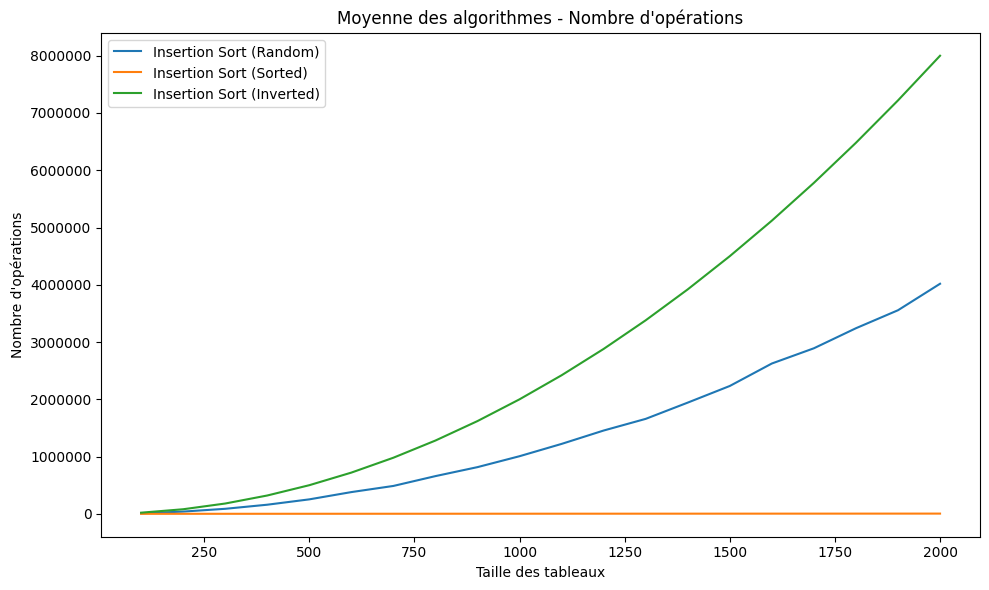

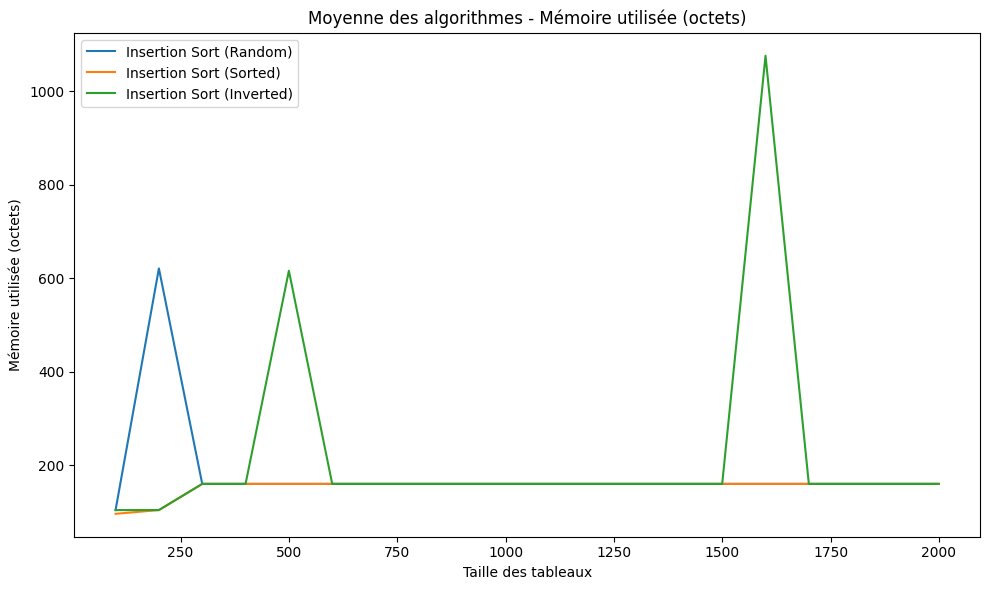

In [4]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[InsertionSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=5, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution :
    - Tableau trié (meilleur cas) : l'algo est extrêmement rapide; il ne fait aucun décalage, que des comparaisons. Lorsqu'on benchmark l'algo seulement sur la liste 'sorted', nous remarquons que le temps est simplement linéaire donc conforme à O(n).
    - Tableau aléatoire (cas moyen) : le temps suit une courbe quadratique plus faible que dans le pire des cas, mais confirmant la complexité O(n²).
    - Tableau inversé (pire cas) : le temps est le plus élevé mais en courbe quadratique, conforme à O(n²).
    - Globalement, le temps d'exécution est très long.

- Nombre d'opérations :
    - Même tendance, avec un nombre d'opérations linéaire pour le meilleur cas, et quadratique pour les autres, validant les complexités théoriques.
    - Dans le meilleur des cas, il n'y a que peu d'opérations; $taille*2$ (initialisation de 'key' et la comparaison 'key < data[j]'. Mais lorsqu'il faut trier, le nombre d'opérations reste très élevé.

<img src="https://stein-ind.fr/traian/media/moyenne_comparaison_complexity.png" alt="graph_operation_insert_sort" width="500"/>

- Mémoire utilisée :
    - 160 octets au total avec le programme. Très faible consommation en espace, typique de **l'algorithme in-place**. La complexité en espace est **O(1)**.

## Heap Sort

**Heap Sort** utilise un tas binaire (heap) pour trier une liste. D'abord, il transforme la liste en un tas max, puis il extrait successivement le plus grand élément pour le placer à la fin de la liste.


1. **Construction du tas** : Transformer le tableau en un tas max, où chaque parent est plus grand que ses enfants.
2. **Tri** : Échanger l'élément le plus grand avec le dernier élément de la liste non triée, puis ajuster le tas pour maintenir la propriété de max-heap.

- Soit un tableau $A$ de taille $n$. La première étape consiste à construire un tas max en partant de l'indice $\left\lfloor \frac{n}{2} \right\rfloor$ jusqu'à la racine (indice 0). Chaque opération de "heapify" prend $O(\log n)$, mais la construction complète du tas s'effectue en $O(n)$.

- Ensuite, on échange $A[0]$ (la racine; le plus grand élément) avec $A[n-1]$, puis on réorganise le tas de taille $n-1$. Cela prend $O(\log n)$, et on répète cette opération $n$ fois, ce qui donne une complexité de tri de $O(n \log n)$.

Implémentation :

```python
class HeapSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Heap Sort')

    def heapify(self, data, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2 
        operations = 0
        
        if left < n and data[left] > data[largest]:
            largest = left
            operations += 1  # comparaison

        if right < n and data[right] > data[largest]:
            largest = right
            operations += 1 # comparaison 

        if largest != i:
            data[i], data[largest] = data[largest], data[i]
            operations += 3   # 3 opérations pour l'échange

            ops_from_recursive_call = self.heapify(data, n, largest)
            operations += ops_from_recursive_call

        return operations

    def sort(self, data):
        n = len(data)
        operations = 0

        for i in range(n // 2 - 1, -1, -1):
            operations += self.heapify(data, n, i)

        for i in range(n - 1, 0, -1):
            data[i], data[0] = data[0], data[i]
            operations += 3  # 3 opérations pour l'échange
            operations += self.heapify(data, i, 0)

        return data, operations
```

### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Heap Sort       | $O(n \log n)$     | $O(n \log n)$     | $O(n \log n)$     |

**Meilleur Cas : $O(n \log n)$**

Le tas est déjà partiellement ordonné.

- La construction du tas prend $O(n)$ et chaque extraction du sommet nécessite $O(\log n)$ pour rétablir la propriété du tas.

  $$
  T(n) = O(n \log n)
  $$

**Cas Moyen : $O(n \log n)$**

Les éléments sont dans un ordre aléatoire.

- La construction du tas prend $O(n)$, puis $n$ opérations de réorganisation du tas sont nécessaires, chacune en $O(\log n)$.

  $$
  T(n) = O(n \log n)
  $$

**Pire Cas : $O(n \log n)$**

Le tas est dans un état totalement désorganisé, nécessitant un maximum d'opérations de réorganisation après chaque extraction.

  $$
  T(n) = O(n \log n)
  $$


Benchmark 1 / 1
Exécution de Heap Sort


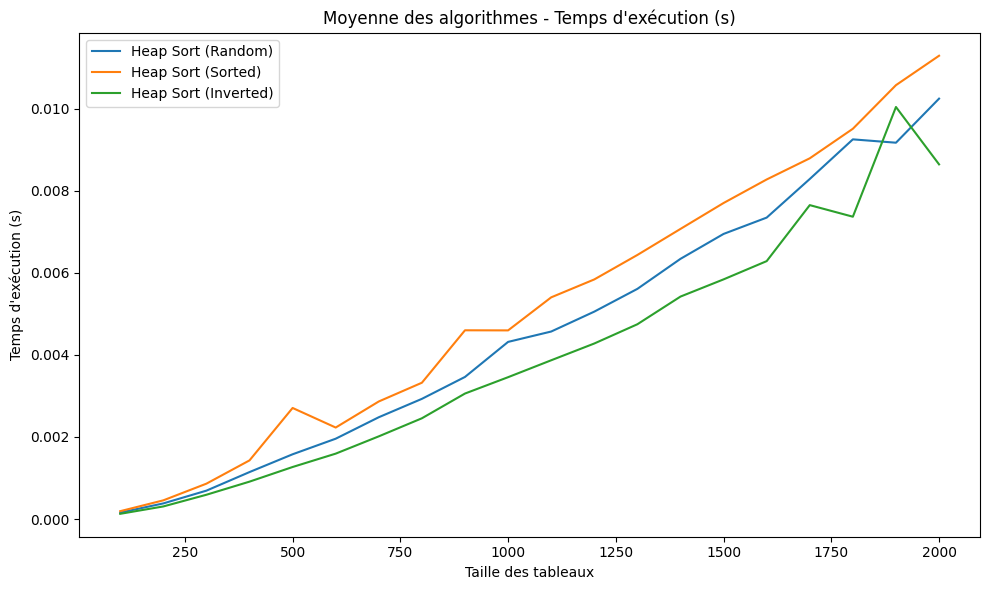

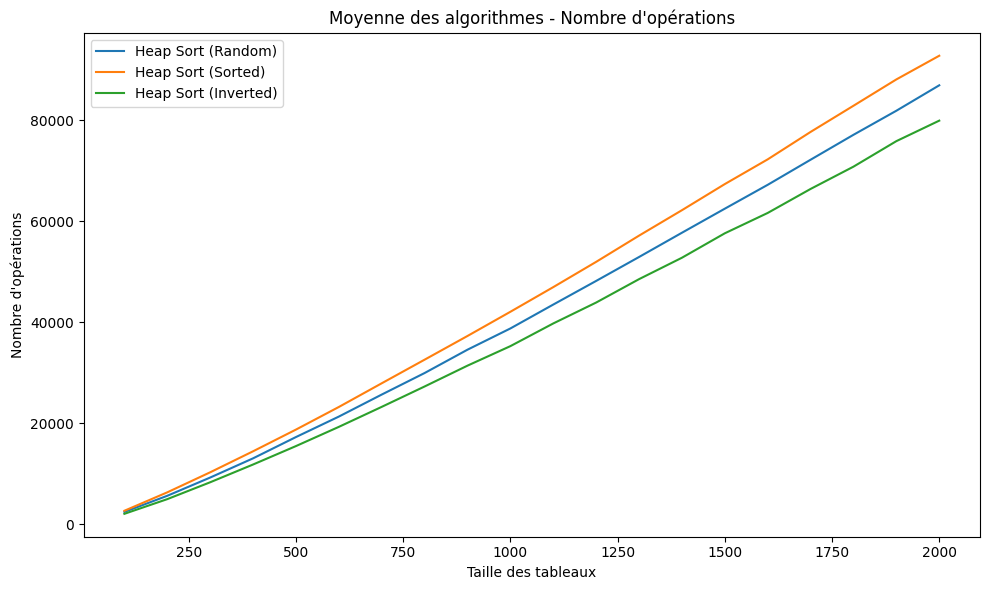

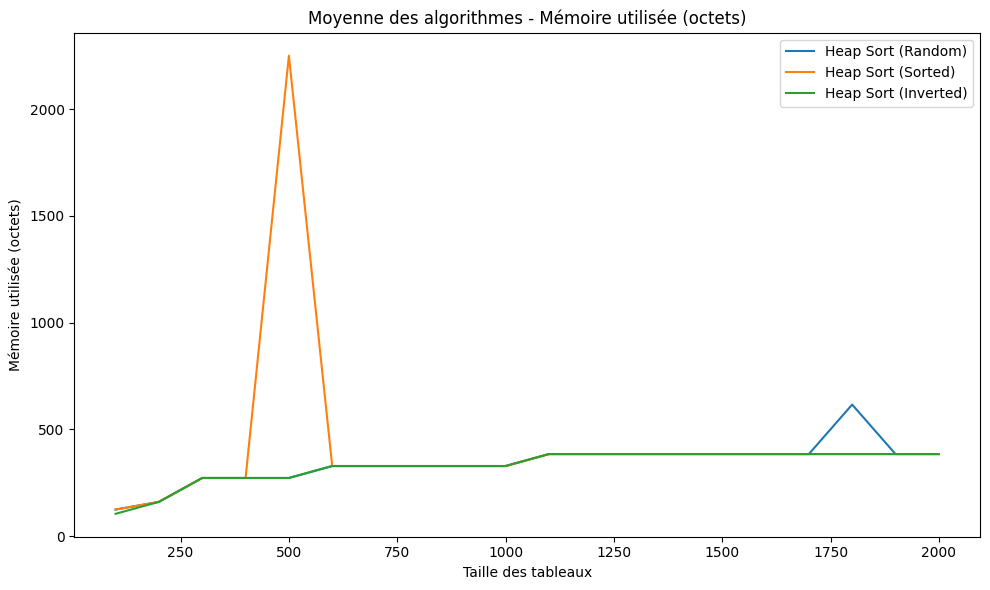

In [5]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[HeapSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=5, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 

- Temps d'exécution :
    - Pour les 3 cas, les temps d'exécution sont proches et conforment à la complexité théorique $O(n \log n)$. L'algorithme Heap Sort est rapide dans tous les scénarios. Globalement, on constate une bonne performance, avec une courbe de complexité plus avantageuse que d'autres algorithmes quadratiques. Cependant, il ne sera pas plus efficace selon la tableau de départ.

- Nombre d'opérations :
    - On observe que, de manière surprenante, le tableau trié demande un peu plus d'opérations que le tableau aléatoire et inversé. Même dans un tableau déjà ordonné, Heap Sort reconstruit un tas et procède aux échanges, même s'ils sont inutiles en termes de tri.
    - Le tableau inversé effectue légèrement moins d'opérations, car il permet des optimisations durant la réorganisation du tas.
    - Le tableau aléatoire se situe entre les deux, avec un comportement qui confirme les attentes d'une complexité moyenne en $O(n \log n)$.
      
- Mémoire utilisée :
    - La consommation en mémoire reste extrêmement faible, montant jusqu'à 750 octets au total pour l'exécution du programme ; complexité spatiale de $O(1)$. L'algorithme n'a besoin que d'un espace constant supplémentaire pour effectuer les échanges lors de la réorganisation du tas.

## Quick Sort

L'algorithme fonctionne en sélectionnant un pivot, puis en réarrangeant les éléments de manière à ce que ceux inférieurs au pivot soient à gauche et ceux supérieurs soient à droite. Ensuite, il applique récursivement ce processus sur les sous-listes. Cela peut parfois entraîner des déséquilibres, selon le choix du pivot.

Soit un tableau $A$ de taille $n$. Quick Sort repose sur le principe de **diviser pour régner** : il choisit un pivot, partitionne le tableau autour de ce pivot, puis trie récursivement les sous-listes gauche et droite. À chaque étape de partition, le coût est de $O(n)$ car il faut comparer chaque élément au pivot. La complexité globale dépend donc du nombre de niveaux de récursion, qui est lié à la taille des sous-listes après chaque partition.

**Étape de partition** :
   - Le coût de la partition est $O(n)$ car il faut comparer chaque élément du tableau au pivot. 
   - Soit $T(n)$ le temps pour trier un tableau de taille $n$. Si la partition divise le tableau en deux sous-listes de tailles égales, la relation de récurrence est :
     \[
     T(n) = 2T\left(\frac{n}{2}\right) + O(n)
     \]
   - Cette équation de récurrence résout à $O(n \log n)$ dans le cas d'une partition équilibrée, ce qui correspond au **meilleur cas** et au **cas moyen**.

**Profondeur de récursion** :
   - Si la partition est équilibrée (chaque sous-liste est de taille à peu près égale), la profondeur de récursion est $O(\log n)$.
   - Si la partition est déséquilibrée (par exemple, si le tableau est déjà trié et que le pivot est mal choisi), la profondeur de récursion peut aller jusqu'à $O(n)$, ce qui correspond au **pire cas**.

Intégration :
```python
from sys import setrecursionlimit

class QuickSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Quick Sort')

    def swap(self, arr, i, j):
        arr[i], arr[j] = arr[j], arr[i]

    def partition(self, arr, low, high):
        operations = 0

        mid = (low + high) // 2
        pivot = arr[mid] # Pivot au milieu du tableau
        self.swap(arr, mid, high)
        operations += 3  # échange du pivot avec la fin
        
        i = low - 1
        
        for j in range(low, high):
            operations += 1  # Comparaison
            if arr[j] < pivot:
                i += 1
                self.swap(arr, i, j)
                operations += 3  # Échange = 3 opérations
        
        self.swap(arr, i + 1, high)
        operations += 3  # Échange du pivot
        
        return i + 1, operations

    def quicksort(self, arr, low, high):
        operations = 0
        if low < high:
            pi, partition_operations = self.partition(arr, low, high)
            operations += partition_operations

            operations += self.quicksort(arr, low, pi - 1)
            operations += self.quicksort(arr, pi + 1, high)

        return operations

    def sort(self, data):
        setrecursionlimit(50000) # permet d'augmenter le nb de récursions
        operations = self.quicksort(data, 0, len(data) - 1)
        return data, operations
```

### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Quick Sort      | $O(n \log n)$     | $O(n \log n)$     | $O(n^2)$          |

**Meilleur Cas : $O(n \log n)$**

- Si le pivot est bien choisi (pivot central), chaque partition divise le tableau en deux sous-listes d'environ taille égale. Le nombre d'étapes de récursion est alors $O(\log n)$, et chaque étape coûte $O(n)$ en temps de partition.
$$
T(n) = 2T\left(\frac{n}{2}\right) + O(n) = O(n \log n)
$$

**Cas Moyen : $O(n \log n)$**

- En moyenne, même si les partitions ne sont pas toujours parfaitement équilibrées, elles sont suffisamment proches pour que la complexité reste en $O(n \log n)$.
$$
T(n) = O(n \log n)
$$

**Pire Cas : $O(n^2)$**

- Si le pivot est mal choisi (comme prendre le premier ou le dernier élément comme pivot dans une liste déjà triée ou inversée), chaque partition ne réduit la taille du tableau que d'un seul élément. La profondeur de récursion devient $O(n)$ et le nombre total de comparaisons augmente.
$$
T(n) = (n-1) + (n-2) + \dots + 1 = \frac{n(n-1)}{2} = O(n^2)
$$
*J'ai eu l'occasion de voir mon programme planter pour des trop grands tableaux en choisissant un mauvais pivot.*

Benchmark 1 / 1
Exécution de Quick Sort


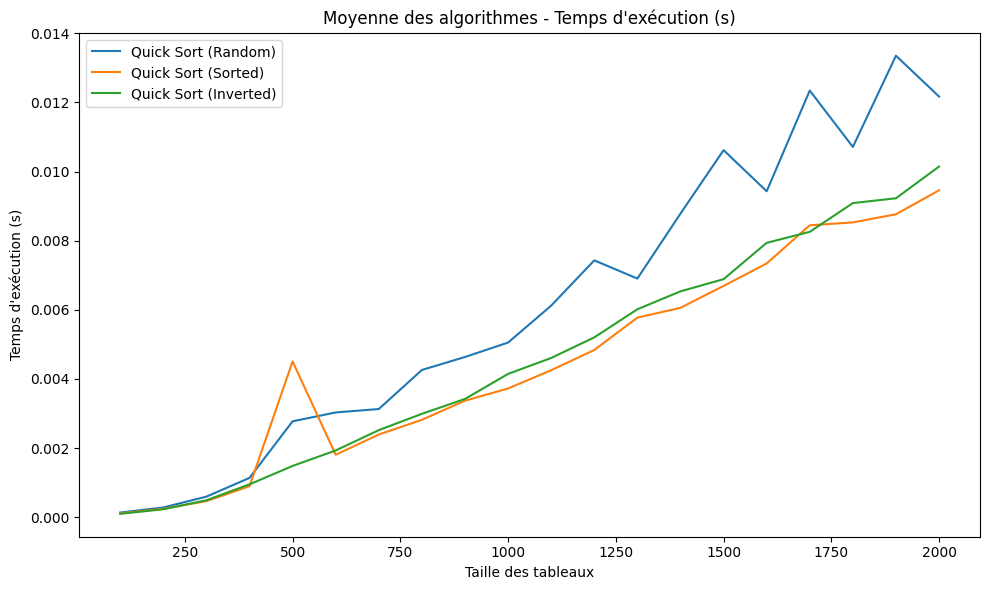

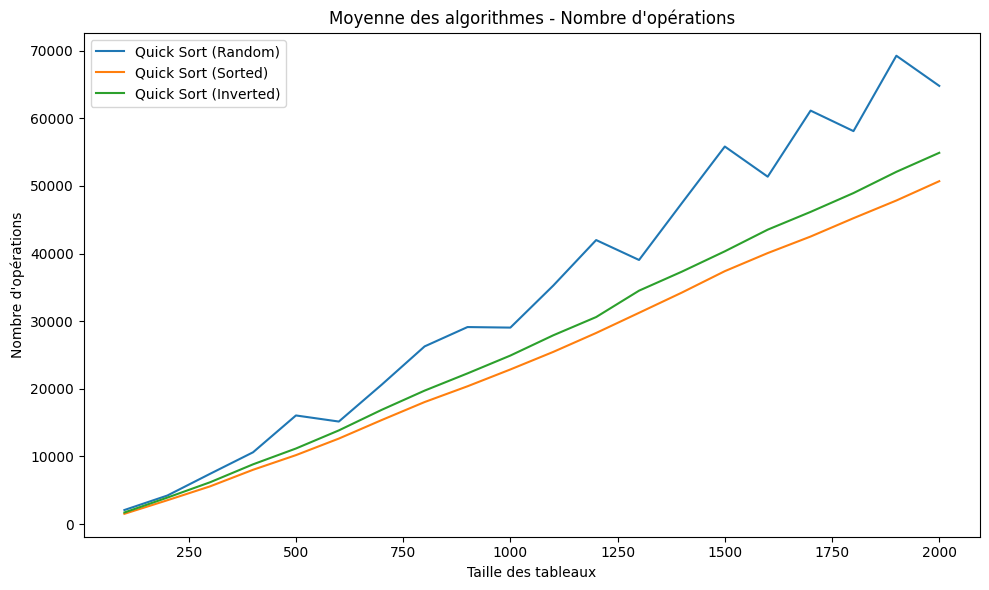

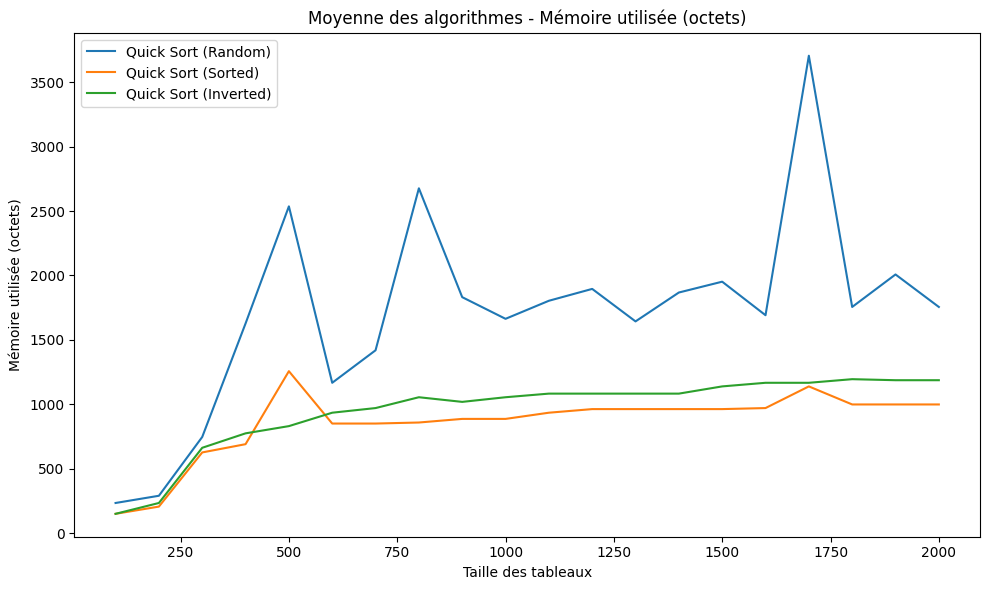

In [6]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[QuickSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=5, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 

- Temps d'exécution :
    - Listes triées et inversées :
Les temps d'exécution pour les listes triées et inversées sont très proches, confirmant bien la complexité théorique $O(n \log n)$ dans ces cas. Les deux courbes sont relativement stables avec une croissance progressive.
Le cas inversé semble parfois légèrement plus rapide que le cas trié, ce qui pourrait être dû à la manière dont le pivot gère les inversions.
    - Listes aléatoires :
Pour les listes aléatoires, le temps d'exécution est non seulement plus élevé, mais il présente aussi des variations irrégulières (on observe des pics). Ces fluctuations peuvent être attribuées à des partitions moins équilibrées, qui rendent le processus de tri plus coûteux en certains points.

Malgré cela, Quick Sort reste performant, et globalement plus rapide que les précédents algorithmes.

- Nombre d'opérations :
    - Listes triées et inversées :
Les courbes des listes triées et inversées sont assez similaires et présentent un nombre d'opérations stable, augmentant linéairement avec la taille des tableaux, conformément à la complexité $O(n \log n)$. 

    - Listes aléatoires :
Comme pour le temps d'exécution, le nombre d'opérations pour les listes aléatoires est significativement plus élevé et fluctuant. 
Cela reste conforme à la complexité théorique $O(n \log n)$ en moyenne, mais il y a des moments où certaines partitions sont déséquilibrées (pics).

- Mémoire utilisée :
    - Listes triées et inversées : 
    La consommation mémoire est relativement stable après une augmentation initiale. Elle oscille autour de 1000 à 1500 octets pour les tableaux de grande taille. Cela correspond bien à la complexité en espace de $O(\log n)$, qui dépend de la profondeur maximale de récursion dans Quick Sort.
La courbe pour les listes triées est légèrement plus basse que celle des listes inversées, ce qui pourrait indiquer un meilleur équilibrage des partitions dans le cas trié.
    - Listes aléatoires :
    Pour les listes aléatoires, on observe des fluctuations beaucoup plus importantes dans la consommation mémoire, atteignant parfois plus de 2000 octets. Cela s'explique par des partitions parfois déséquilibrées, nécessitant un plus grand nombre de niveaux de récursion, ce qui augmente la profondeur de la pile d'appels.
 

En conclusion, cet algorithme est efficace mais peut se montrer instable sur les listes aléatoires.

## Merge Sort

L'algorithme **Merge Sort** suit le principe de **diviser pour régner**. Il divise un tableau en deux sous-listes, les trie récursivement, puis fusionne les sous-listes triées. Cette approche garantit une complexité en temps de **$O(n \log n)$** dans tous les cas.

### Partie mathématique

Soit un tableau $A$ de taille $n$. Merge Sort peut être formellement décrit par les étapes suivantes :

1. **Étape de division** :
   - Le tableau $A$ est divisé en deux sous-listes égales de taille $\frac{n}{2}$, jusqu'à ce que chaque sous-liste ne contienne qu'un seul élément.
   - Le nombre total de divisions correspond au nombre de fois que $n$ peut être divisé par 2, soit $\log n$ niveaux de récursion.

2. **Étape de fusion** :
   - Chaque sous-liste est ensuite fusionnée avec une autre sous-liste triée, ce qui nécessite de parcourir tous les éléments des sous-listes. Le coût de la fusion est linéaire, soit $O(n)$ par niveau de récursion.
   - À chaque niveau de la récursion, on fusionne les sous-listes, nécessitant $n$ comparaisons pour regrouper les éléments dans l'ordre croissant.


### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Merge Sort      | $O(n \log n)$     | $O(n \log n)$     | $O(n \log n)$     |

**Tous les Cas : $O(n \log n)$**

Faisons un peu de maths pour démontrer que pour tous les tableaux, on aura une complexité de $O(n \log n)$.

Le temps total $T(n)$ pour trier un tableau de taille $n$ peut être décrit par la relation de récurrence suivante :

$$
T(n) = 2T\left(\frac{n}{2}\right) + O(n)
$$

Car :
- **$2T\left(\frac{n}{2}\right)$** : Le coût de trier les deux sous-listes de taille $\frac{n}{2}$.
- **$O(n)$** : Le coût de fusionner ces deux sous-listes triées.

En résolvant cette équation de récurrence par substitution, on obtient :
$$
T(n) = 2T\left(\frac{n}{2}\right) + n
$$

Substituons jusqu'à atteindre la base de la récursion (taille $n=1$) :

$$
T(n) = 2\left[2T\left(\frac{n}{4}\right) + \frac{n}{2}\right] + n = 4T\left(\frac{n}{4}\right) + 2n
$$
$$
T(n) = 8T\left(\frac{n}{8}\right) + 3n = \dots = 2^kT\left(\frac{n}{2^k}\right) + kn
$$

Lorsque $\frac{n}{2^k} = 1$ (c'est-à-dire $k = \log n$), nous atteignons la base de la récursion où $T(1) = O(1)$ :

$$
T(n) = O(n \log n)
$$

Cfqd, Merge Sort a une complexité temporelle de **$O(n \log n)$** peu importe le tableau donné.

### Nombre d'opérations :

Le nombre d'opérations est dominé par les fusions, qui nécessitent de comparer chaque élément dans les deux sous-listes. À chaque niveau de récursion, il y a $n$ comparaisons pour la fusion, et comme il y a $\log n$ niveaux de récursion, le nombre total d'opérations suit la complexité **$O(n \log n)$**.

### Mémoire utilisée :

- **Merge Sort** n'est pas un algorithme **in-place**, car il nécessite de l'espace supplémentaire pour stocker les sous-listes fusionnées.
- La **complexité en espace** est donc de **$O(n)$**, car il faut allouer un espace temporaire pour stocker les éléments des sous-listes avant la fusion.
- Cela signifie que Merge Sort consomme plus de mémoire que des algorithmes comme Quick Sort, qui ont une complexité spatiale plus faible.

---

### Conclusion :

Merge Sort est un algorithme de tri efficace avec une complexité en temps **$O(n \log n)$** dans tous les cas (meilleur, moyen, pire). Cependant, il consomme plus de mémoire avec une complexité spatiale de **$O(n)$** à cause de la fusion des sous-listes. Il est particulièrement adapté aux situations où des performances constantes sont requises, indépendamment de la structure initiale des données.


Benchmark 1 / 1
Exécution de Merge Sort


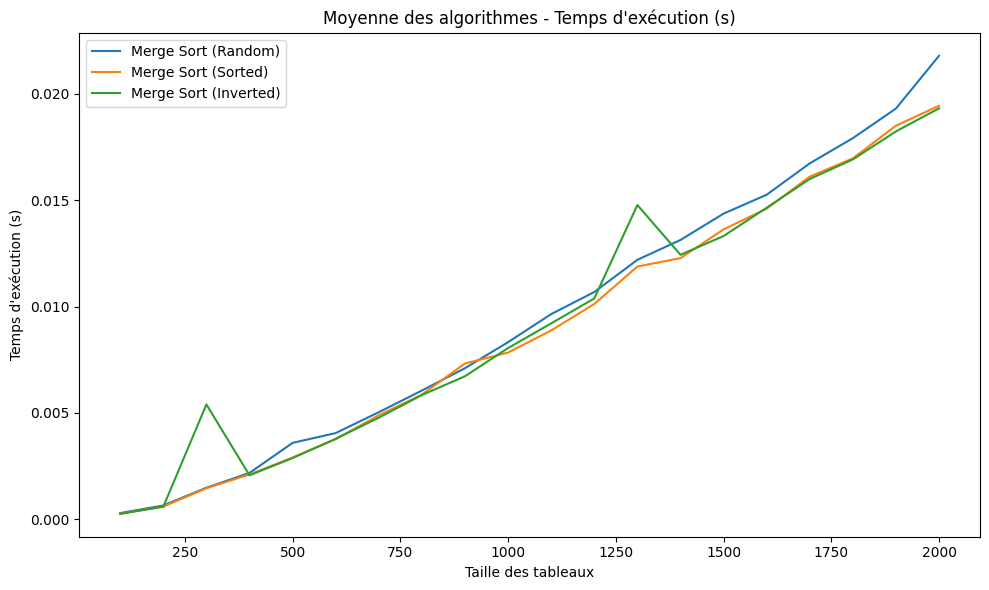

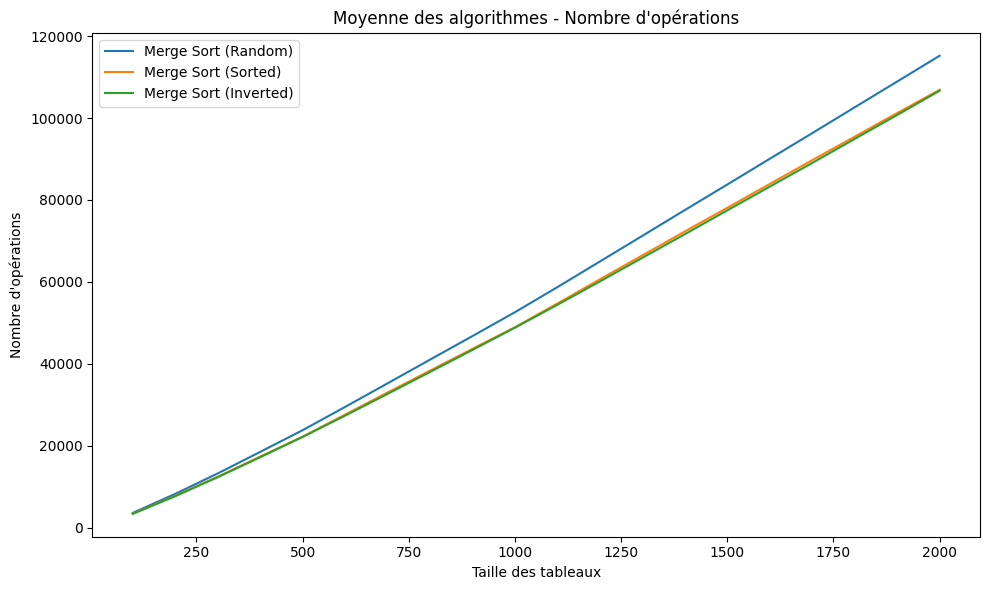

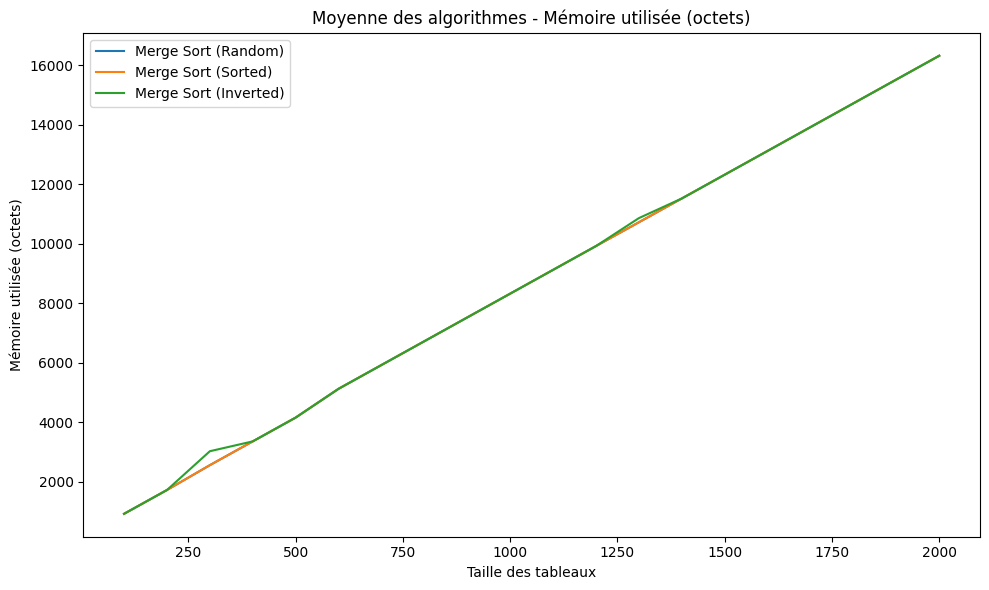

In [7]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[MergeSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=5, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 

- Temps d'exécution :
    - Listes triées et inversées :
    Le temps d'exécution est similaire et conforme à la complexité théorique **$O(n \log n)$**. Les deux courbes sont pratiquement superposées et suivent une croissance régulière et prévisible.
    - Listes aléatoires :
    Le temps d'exécution est légèrement plus élevé que pour les autres cas. Cela peut s'expliquer par le fait que chaque fusion nécessite de réarranger les éléments de manière moins prévisible, ce qui impose plus de comparaisons et d'écritures. Cependant, cette différence reste faible et correspond toujours à la complexité théorique attendue **$O(n \log n)$**.

La courbe présente une croissance régulière, montrant que l'algorithme reste performant même sur des tableaux de grande taille.
Le fait que les performances soient similaires, quel que soit l'ordre initial des éléments.

- Nombre d'opérations :
    - Listes triées et inversées :
    Le nombre d'opérations pour les listes triées et inversées est presque identique. Cela correspond à la nature de cet algo qui divise le tableau en sous-listes indépendamment de l'ordre des éléments. La fusion demande toujours $O(n)$ comparaisons à chaque niveau de récursion, quelle que soit la structure initiale.

    - Listes aléatoires :
    Le nombre d'opérations est plus élevé pour les listes aléatoires, mais il reste linéairement proportionnel à la taille du tableau, avec une croissance régulière. Cette différence s'explique par le fait que les éléments doivent être comparés et réarrangés plus intensivement lors de la fusion dans un tableau aléatoire.

Globalement, la complexité théorique **$O(n \log n)$** est bien respectée dans tous les cas.

- Mémoire utilisée :
    - Listes triées et inversées :
    La mémoire utilisée est proportionnelle à la taille du tableau, ce qui est conforme à la complexité spatiale **$O(n)$**. L'algo nécessite un espace supplémentaire pour stocker temporairement les sous-listes lors de la fusion.

- Listes aléatoires :
    La mémoire consommée est similaire aux autres cas, avec une légère fluctuation. mais l'usage de la mémoire supplémentaire reste stable et conforme à la complexité en espace attendue **$O(n)$**.
    - La courbe est légèrement plus basse que celle des listes inversées, ce qui pourrait indiquer que dans certains cas, la structure plus aléatoire permet une gestion plus efficace des sous-listes en termes de répartition mémoire.

Cet algorithme est très efficace en terme de temps, et est stable peu importe le tableau d'entrée. Cependant, il vient être très gourmand en mémoire puisque sa complexité spaciale est des $O(n)$.

# III/Comparaison des algorithmes

Dans cette partie, nous allons comparer les performances de 6 algorithmes de tri : **Bubble Sort**, **Selection Sort**, **Insertion Sort**, **Heap Sort**, **Quick Sort** et **Merge Sort**. Chacun de ces algorithmes a des particularités en termes de complexité temporelle et spatiale.

L'objectif est d'observer leur comportement sur trois types de listes : des **listes triées**, des **listes aléatoires** et des **listes inversées**.

Cette comparaison est essentielle pour comprendre quel algorithme de tri est le plus approprié selon le type de données et les contraintes du problème à résoudre.

## Récap

Pour commencer, remettons nos données trouvées dans un tableau.

| Algorithme      | Meilleur Cas      | Cas Moyen         | Pire Cas          | Complexité Spatiale | Type d'algorithme  |
|-----------------|-------------------|-------------------|-------------------|---------------------|--------------------|
| **Bubble Sort** | $O(n)$            | $O(n^2)$          | $O(n^2)$          | $O(1)$              | In-place, Stable   |
| **Selection Sort** | $O(n^2)$       | $O(n^2)$          | $O(n^2)$          | $O(1)$              | In-place, Non-stable |
| **Insertion Sort** | $O(n)$         | $O(n^2)$          | $O(n^2)$          | $O(1)$              | In-place, Stable   |
| **Heap Sort**    | $O(n \log n)$     | $O(n \log n)$     | $O(n \log n)$     | $O(1)$              | In-place, Non-stable |
| **Quick Sort**   | $O(n \log n)$     | $O(n \log n)$     | $O(n^2)$          | $O(\log n)$         | In-place, Non-stable |
| **Merge Sort**   | $O(n \log n)$     | $O(n \log n)$     | $O(n \log n)$     | $O(n)$              | Non In-place, Stable |

Nous allons ensuite comparer chaque algo pour chaque cas de listes.


## a/Listes triées

#### Insertion Sort
**Complexité : $O(n)$**  
**Complexité spatiale : $O(1)$**

- Cet algorithme est optimisé pour les listes triées, car il n'effectue que $n-1$ comparaisons. Aucune opération supplémentaire n'est nécessaire, chaque élément étant déjà à sa place.
- Il est le plus performant sur les listes triées avec une complexité linéaire.

#### Bubble Sort
**Complexité : $O(n)$**  
**Complexité spatiale : $O(1)$**

- Il effectue $(n-1)$ comparaisons, il sera aussi le plus performant.

#### Selection Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Il ne profite pas de l'ordre initial. Même sur une liste triée, il effectue toujours $n(n-1)/2$ comparaisons pour trouver le minimum à chaque itération.
- C'est l'un des algorithmes les moins efficaces dans ce cas.

#### Heap Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(1)$**

- L'ordre initial ne change pas sa performance, car il doit toujours construire un tas, même si la liste est déjà triée. Chaque extraction du maximum reste en $O(\log n)$.
- Il maintient une complexité stable, mais ne tire aucun avantage d'une liste déjà triée.

#### Quick Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(\log n)$**

- Dépend fortement du choix du pivot. Notre pivot permet de maintenir la complexité en $O(n \log n)$
- Il reste relativement efficace, mais ne profite pas pleinement d'une liste déjà triée.

#### Merge Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(n)$**

- Il reste indifférent à l'ordre initial. Même sur une liste triée, il continue de diviser et de fusionner les sous-listes, sans pouvoir réduire le nombre de comparaisons.
- En plus de ne pas profiter de l'ordre, sa complexité spatiale reste élevée à cause de la fusion des sous-listes.

### Conclusion

- **Insertion Sort** se démarque avec sa complexité linéaire $O(n)$ et son faible usage de mémoire.
- **Bubble Sort** se démarque aussi avec son "optimisation" donnant une complexité linéaire de $O(n)$. Sans cette "optimisation", il serait un des moins bons performants étant donné qu'il effectuerait le trie dans tout la liste avec une complexité de $O(n^2)$.
- **Selection Sort** est inefficace, avec une complexité temporelle de $O(n^2)$, même sur une liste triée.
- **Heap Sort** et **Quick Sort** ne profitent pas de l'ordre, mais maintiennent une complexité en $O(n \log n)$, Quick Sort ayant une empreinte spatiale plus importante ($O(\log n)$).
- **Merge Sort** est performant en temps mais coûteux en espace avec $O(n)$, ne profitant pas non plus de l'ordre préétabli.


Testons cela empiriquement :


Benchmark 1 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 2 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 3 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 4 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 5 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


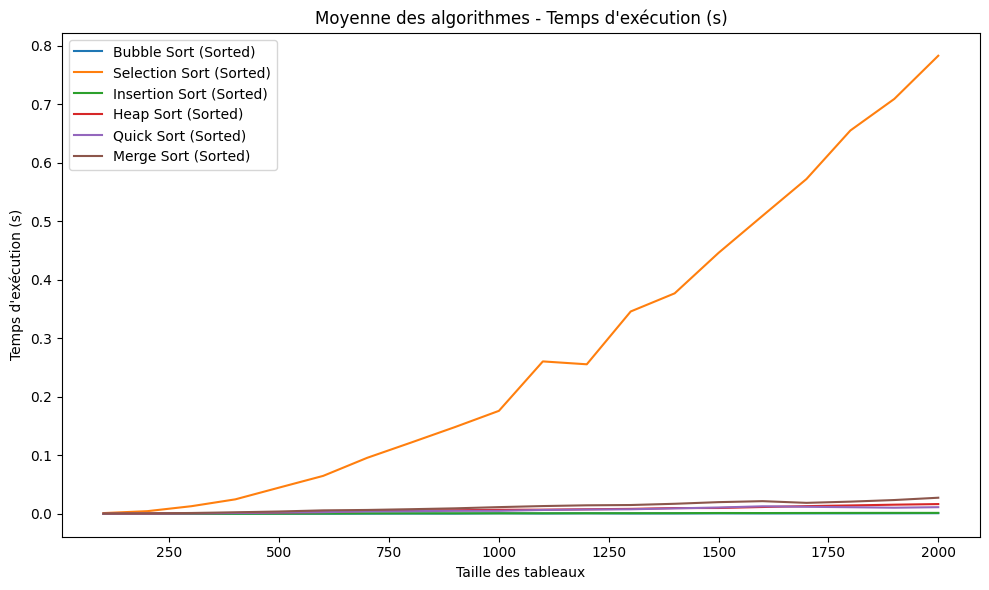

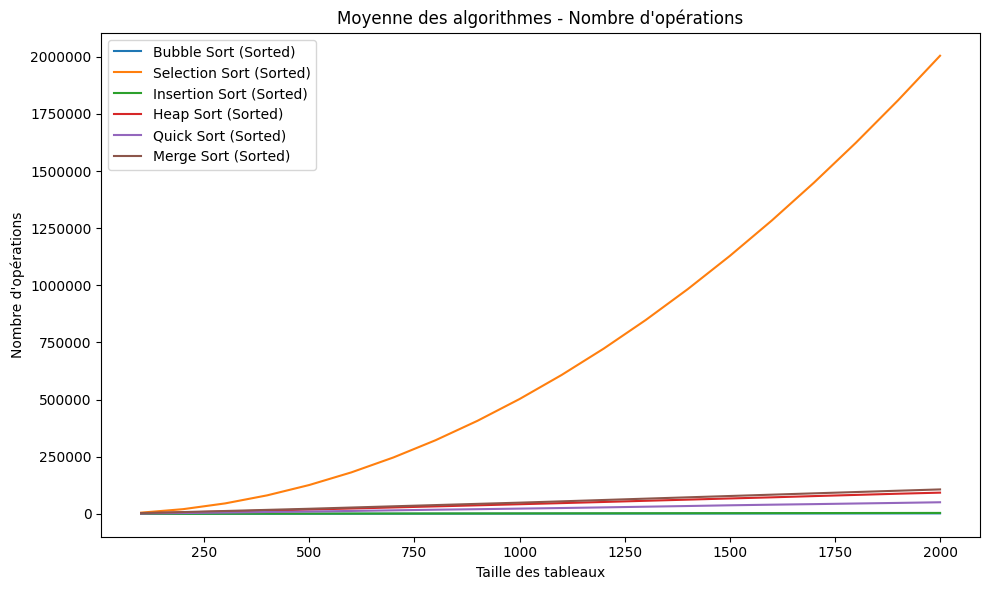

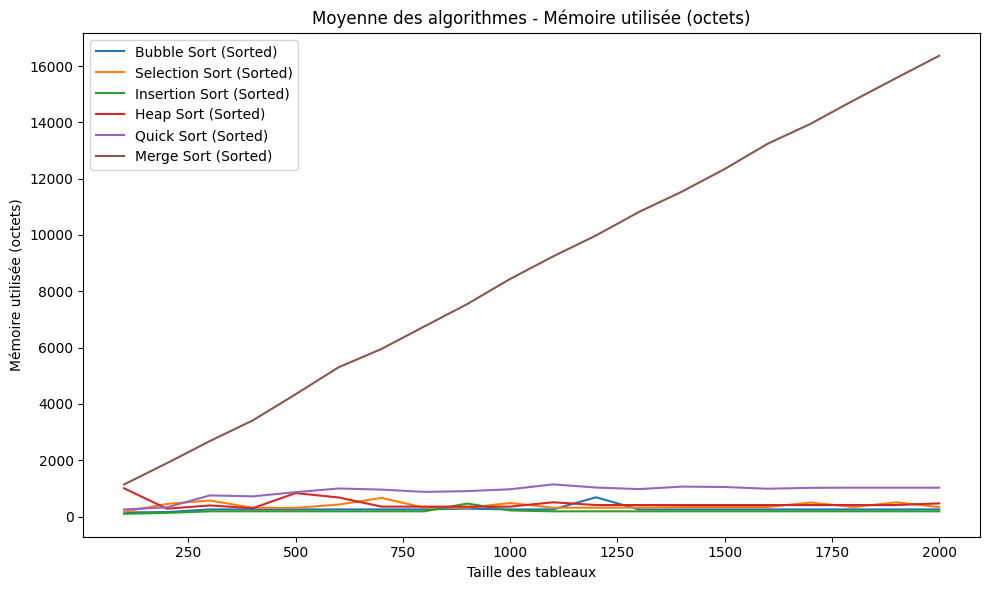

In [1]:
from projet_BEAUJARD_Traian import *

algorithms=[
    BubbleSort(), 
    SelectionSort(), 
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['sorted'], 
    n_runs=5, 
    show_plots=True)

benchmark.run()

Nous remarquons, d'après les graphiques que :

- Selection Sort ne tire clairement pas profit de la liste triée, le rendant ainsi inconsidérablement lent face aux autres.

Pour mieux analyser les autres algorithmes, nous allons refaire un benchmark mais sans le Selection Sort.

Benchmark 1 / 1
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


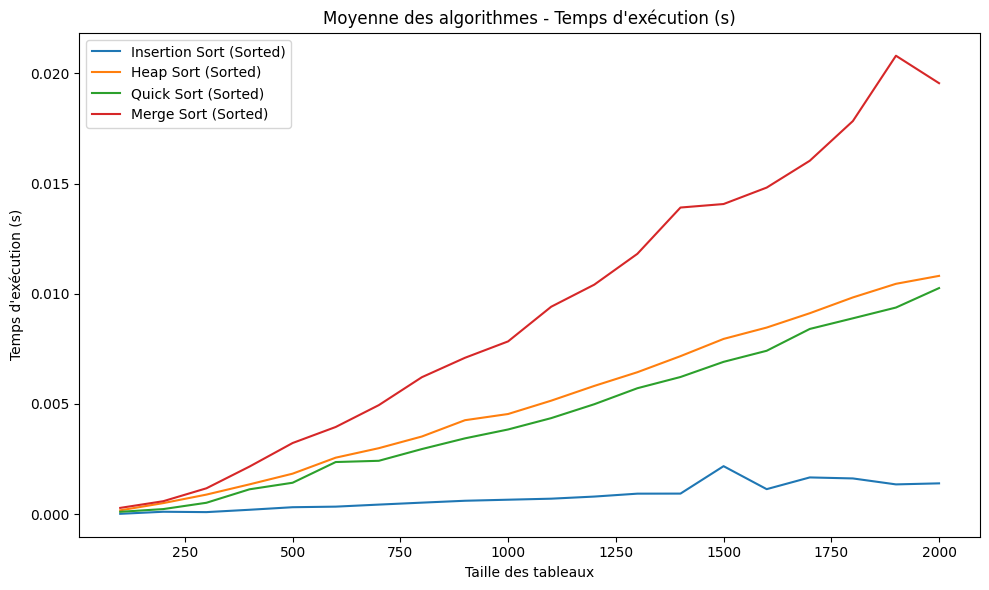

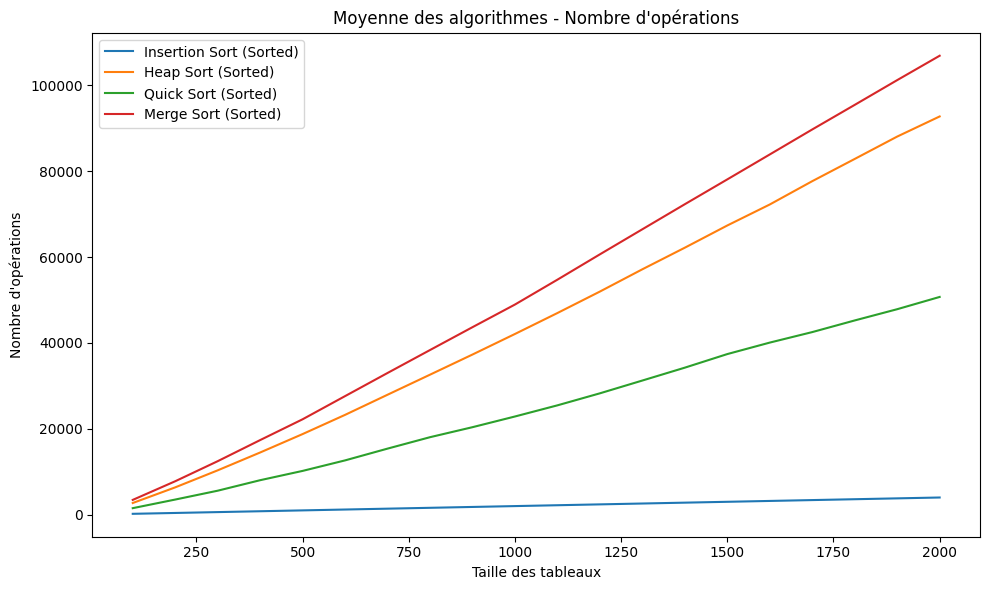

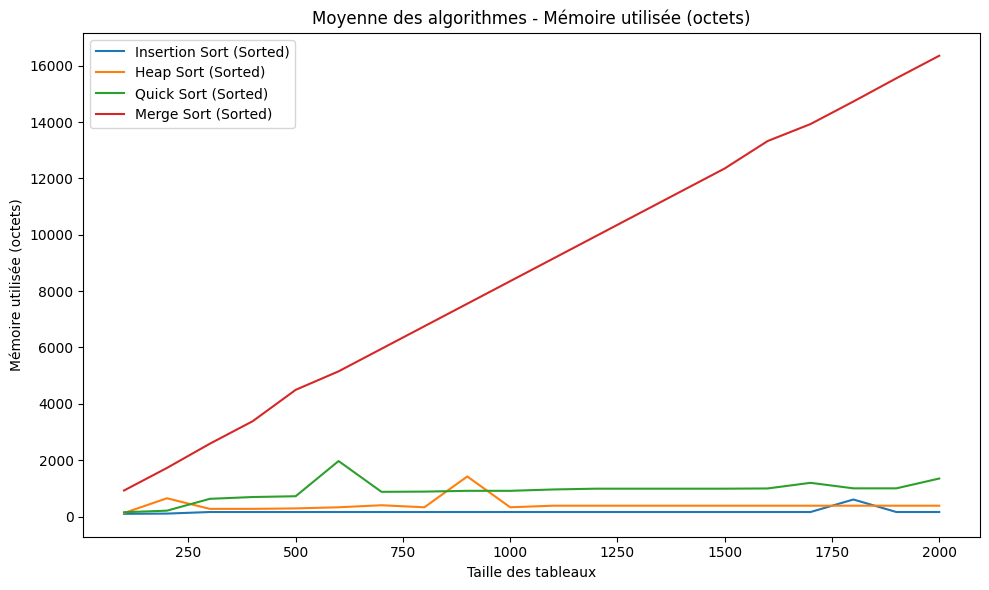

In [9]:
from projet_BEAUJARD_Traian import *

algorithms=[
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['sorted'], 
    n_runs=5, 
    show_plots=True)

benchmark.run()

Nous remarquons bien d'après les graphiques que :

- Temps et Nombre d'opérations :
    - Insertion Sort et Bubble Sort sont les plus performants en nombre d'opérations pour les listes triées, comme attendu. Insertion Sort et Bubble Sort (optimisé) nécessitent un nombre minimal d'opérations proches de $O(n)$.
    - Heap Sort et Merge Sort gardent des performances constantes autour de $O(n \log n)$, comme prévu, mais ne bénéficient pas de l'ordre initial de la liste.

- Mémoire utilisée :
 - Merge Sort consomme nettement plus de mémoire que les autres algorithmes. Sur une liste déjà triée, il utilise inutilement des ressources.


## b/Listes inversées

#### Insertion Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Dans le cas des listes inversées, cet algorithme est très inefficace. À chaque itération, il doit comparer chaque nouvel élément avec tous ceux qui le précèdent, ce qui entraîne $n(n-1)/2$ comparaisons et déplacements.
- Il s'agit ici du **pire cas** pour Insertion Sort, car il doit réorganiser entièrement la liste.

#### Bubble Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Bubble Sort doit effectuer de nombreuses passes sur la liste inversée pour faire "remonter" chaque élément à sa position correcte. Chaque élément doit être comparé et échangé avec tous les autres, ce qui entraîne une complexité de $O(n^2)$.
- Ce comportement est attendu, car Bubble Sort ne bénéficie pas du fait que la liste est inversée et effectue toujours autant d'échanges et de comparaisons.

#### Selection Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Comme pour les listes triées, cet algorithme effectue toujours $n(n-1)/2$ comparaisons pour trouver le minimum à chaque itération, même si la liste est inversée.
- La liste étant inversée, les échanges sont systématiques, mais cela ne change pas sa complexité, qui reste en $O(n^2)$.

#### Heap Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(1)$**

- L'ordre inversé ne change pas la performance de Heap Sort. Il commence par réorganiser les éléments pour former un tas, puis procède à des extractions répétées du maximum. Chaque extraction et réorganisation coûte $O(\log n)$, pour un total de $O(n \log n)$.
- L'algorithme reste donc stable et efficace même pour une liste inversée.

#### Quick Sort
**Complexité : $O(n^2)$ (pire cas)**  
**Complexité spatiale : $O(\log n)$**

- Quick Sort atteint ici son **pire cas** si le pivot est choisi comme le premier ou le dernier élément, car la liste inversée est l'exemple typique d'une partition déséquilibrée. Chaque partition ne réduit la taille que d'un élément, entraînant un nombre maximal de comparaisons et d'appels récursifs.
- Mais notre pivot central permettra de garder la complexité en $O(n \log n)$.

#### Merge Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(n)$**

- L'algorithme reste indifférent à l'ordre inversé des éléments. Il divise systématiquement la liste en sous-listes, puis les fusionne, avec un nombre de comparaisons constant à chaque niveau de récursion.
- La complexité en temps reste donc $O(n \log n)$, mais la consommation de mémoire reste élevée ($O(n)$) en raison de la fusion des sous-listes.

---

### Conclusion

- **Insertion Sort** est extrêmement inefficace sur une liste inversée, atteignant son **pire cas** avec une complexité de $O(n^2)$.
- **Bubble Sort** se comporte de manière similaire avec une complexité en $O(n^2)$, car il doit effectuer de nombreuses passes sur la liste inversée pour trier tous les éléments.
- **Selection Sort**, tout comme pour une liste triée, reste inefficace avec une complexité de $O(n^2)$.
- **Heap Sort** et **Merge Sort** sont plus robustes face à une liste inversée, avec des performances constantes en $O(n \log n)$, car ils ne sont pas affectés par l'ordre initial des éléments.
- **Quick Sort** conserver une complexité en $O(n \log n)$.

Benchmark 1 / 1
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


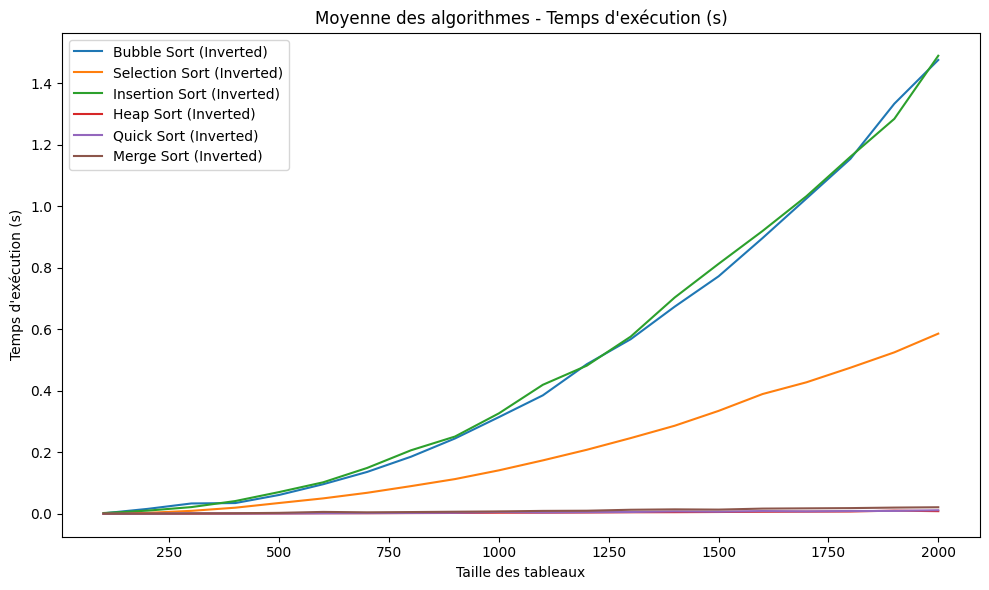

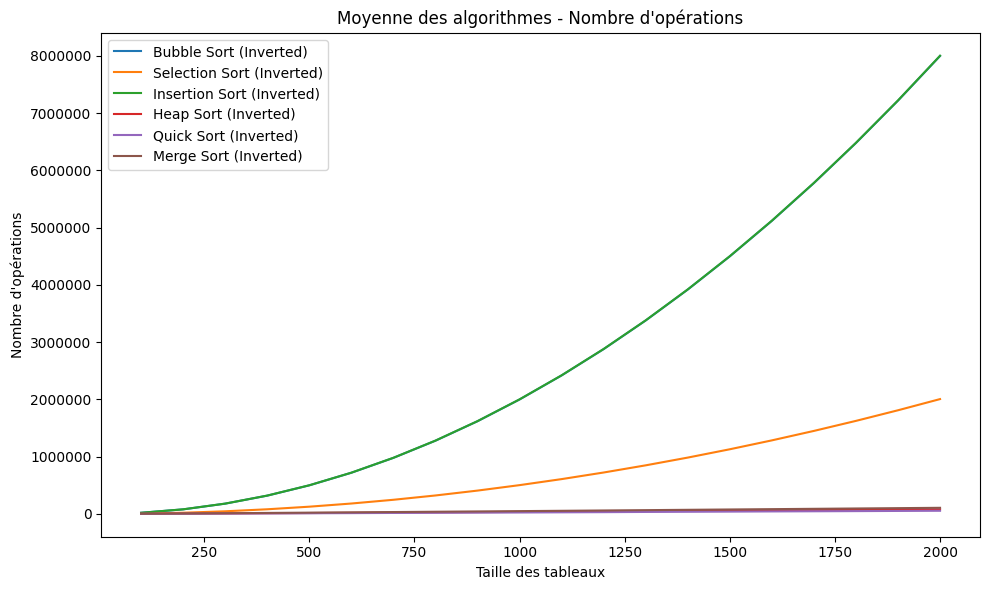

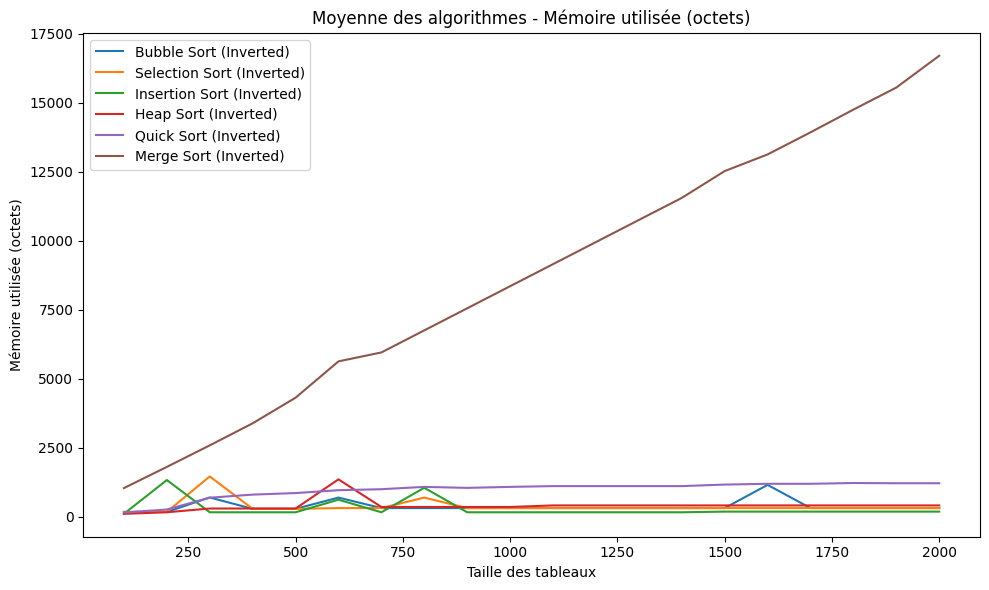

In [10]:
from projet_BEAUJARD_Traian import *

algorithms=[
    BubbleSort(), 
    SelectionSort(), 
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['inverted'], 
    n_runs=5, 
    show_plots=True)

benchmark.run()

Nous remarquons, d'après les graphiques que :

- Les algos Bubble Sort et Insertion Sort s'en sortent très mal avec des complexités temporelles $O(n^2)$.
- L'algo Selection Sort se retrouve avec une performance intermédiaire aux autres.

Pour mieux analyser les autres algorithmes, nous allons refaire un benchmark mais sans le Selection Sort, Bubble Sort, et Insertion Sort.

Benchmark 1 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 2 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 3 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 4 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 5 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 6 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 7 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 8 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 9 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 10 / 10
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


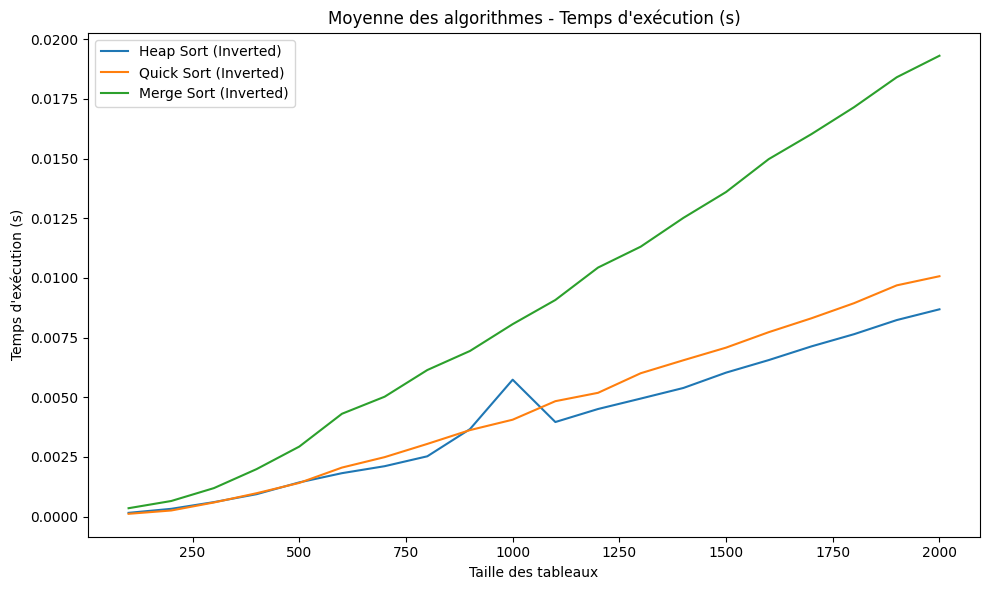

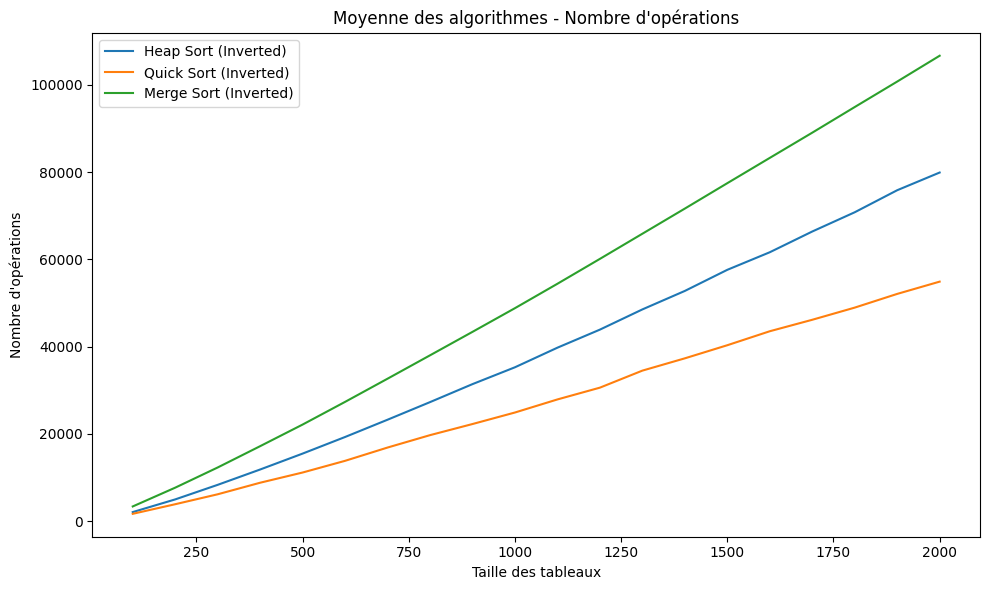

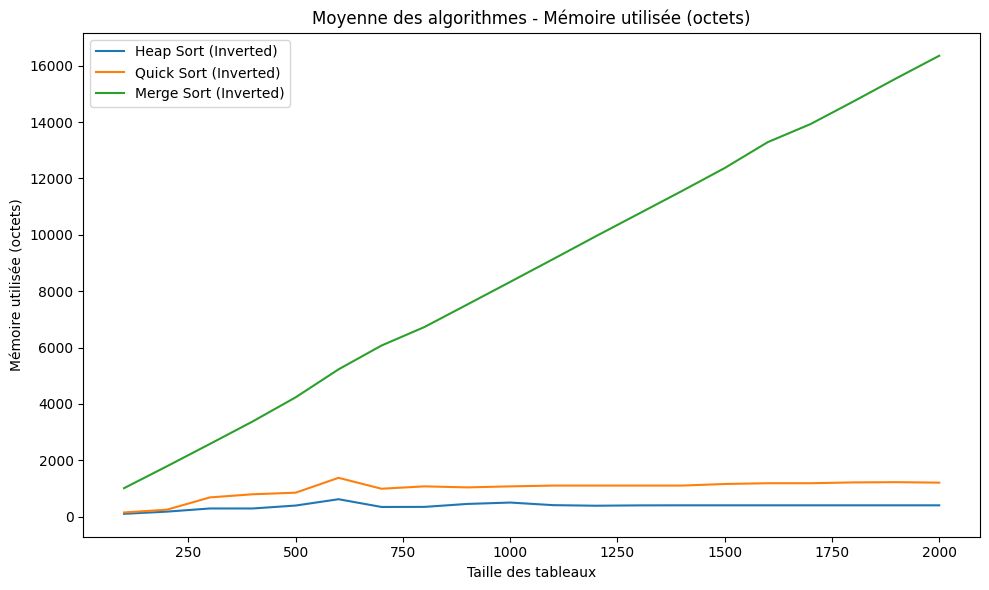

In [11]:
from projet_BEAUJARD_Traian import *

algorithms=[ 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['inverted'], 
    n_runs=5,
    show_plots=True)

benchmark.run()

Nous remarquons bien d'après les graphiques que 

- Temps d'exécution :
    - Merge Sort prend le plus de temps pour trier une liste inversée. La fusion des sous-listes est coûteuse, même avec une complexité en $O(n \log n)$.
    - Heap Sort est en moyenne le plus rapide avec Quick Sort. La complexité reste $O(n \log n)$, mais il effectue moins de comparaisons et manipule moins de mémoire, ce qui lui permet de terminer plus rapidement.

- Nombre d'opérations :
    - Merge Sort a le plus grand nombre d'opérations sur une liste inversée. Ce résultat est attendu car, même avec une liste inversée, Merge Sort effectue une division et une fusion systématique, nécessitant des comparaisons constantes à chaque niveau de récursion ; complexité de $O(n \log n)$.

    - Heap Sort réorganise les éléments en construisant un tas, ce qui nécessite de nombreuses comparaisons et réajustements à chaque extraction. La complexité reste $O(n \log n)$, mais les opérations sont légèrement moins nombreuses que Merge Sort.

    - Quick Sort effectue le moins d'opérations parmi les trois sur une liste inversée. Cela s'explique par un choix de pivot favorable, permettant à Quick Sort d'éviter le pire cas ($O(n^2)$) et de maintenir sa complexité en $O(n \log n)$.

- Mémoire utilisée :
    - Merge Sort consomme bien plus de mémoire que les autres, toujours pour les mêmes raisons.

    - Quick Sort consomme une mémoire intermédiaire, avec une complexité spatiale en $O(\log n)$ en raison de la récursion.

    - Heap Sort est le plus économe en mémoire, avec une consommation stable en $O(1)$.

Conclusion
- Merge Sort se montre constant dans sa complexité, mais il est désavantagé par une plus grande consommation de mémoire et un temps d'exécution plus élevé sur une liste inversée.
- Heap Sort se distingue par son faible usage de mémoire et une exécution plus rapide que Merge Sort, tout en conservant une complexité en $O(n \log n)$.
- Quick Sort reste moins fiable à cause du pivot, et consomme légèrement plus de mémoire que l'algo Heap Sort.

## c) Listes aléatoires

#### Insertion Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Sur une liste aléatoire, Insertion Sort doit insérer chaque élément à sa place dans la partie triée, ce qui nécessite de comparer et déplacer les éléments dans la pire configuration possible. Le nombre de comparaisons et d'échanges reste autour de $n(n-1)/2$, ce qui lui donne une complexité en $O(n^2)$.
- Il sera face aux autres inefficace sur une liste aléatoire, en particulier pour de grandes tailles.

#### Bubble Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Bubble Sort doit effectuer plusieurs passes pour "remonter" les éléments à leur place correcte. Cela lui donne une complexité en $O(n^2)$ pour les listes aléatoires. Il ne sera aussi peu efficace.

#### Selection Sort
**Complexité : $O(n^2)$**  
**Complexité spatiale : $O(1)$**

- Comme pour les listes triées ou inversées, Selection Sort effectue $n(n-1)/2$ comparaisons sur une liste aléatoire, car il doit parcourir l'ensemble des éléments pour trouver le minimum à chaque itération.
- Cet algorithme est également inefficace ici, car il ne bénéficie pas de l'ordre initial des éléments et reste à une complexité en $O(n^2)$.

#### Heap Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(1)$**

- Heap Sort reste stable et efficace sur une liste aléatoire. Il construit un tas à partir des éléments, puis les trie en place en $O(n \log n)$. Les comparaisons et réorganisations nécessaires pour maintenir la propriété du tas restent constantes, ce qui le rend performant.
- Comme pour les autres cas, il maintient une complexité en $O(n \log n)$ sans dépendre de la structure des données initiales.

#### Quick Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(\log n)$**

- Quick Sort conservera une bonne performance sur les listes aléatoires. L'algorithme effectue les comparaisons et réorganisations avec une complexité en $O(n \log n)$. Il fera parti des plus compétitifs.

#### Merge Sort
**Complexité : $O(n \log n)$**  
**Complexité spatiale : $O(n)$**

- Merge Sort reste indifférent à l'ordre initial et maintient sa complexité en $O(n \log n)$ sur une liste aléatoire.
- Cependant, la consommation de mémoire restera élevée avec une complexité spatiale de $O(n)$.

### Conclusion

- **Insertion Sort** et **Bubble Sort** sont inefficaces sur une liste aléatoire, avec une complexité en $O(n^2)$. Bien que Bubble Sort soit optimisé pour arrêter les passes sur une liste triée, cette optimisation n'apporte aucun avantage ici.
- **Selection Sort** conserve une complexité de $O(n^2)$ sur une liste aléatoire.
- **Heap Sort**, **Quick Sort** et **Merge Sort** sont bien plus performants, avec des complexités stables en $O(n \log n)$, Heap Sort étant le plus économe en mémoire.


Benchmark 1 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 2 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 3 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 4 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 5 / 5
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


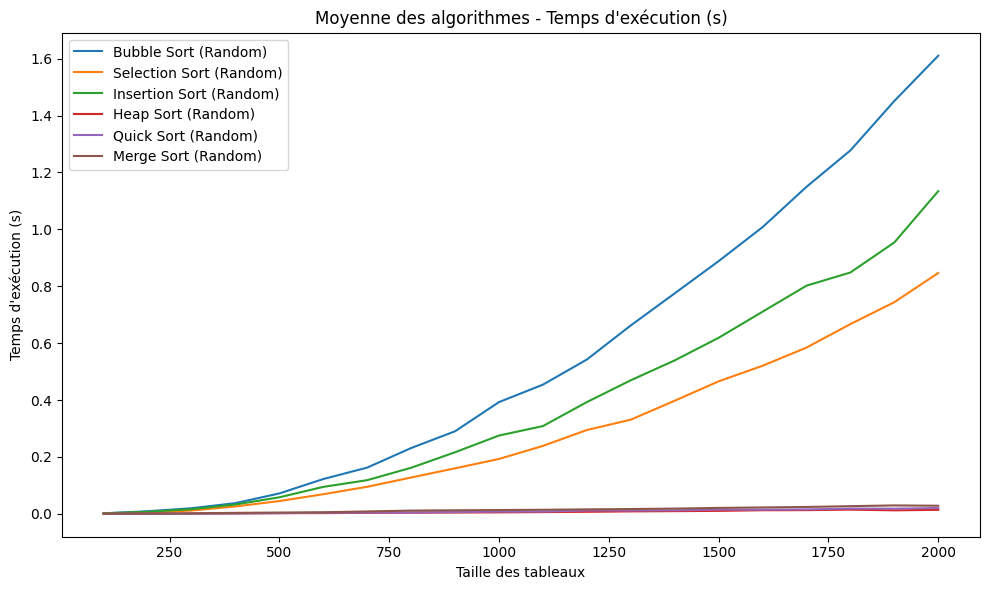

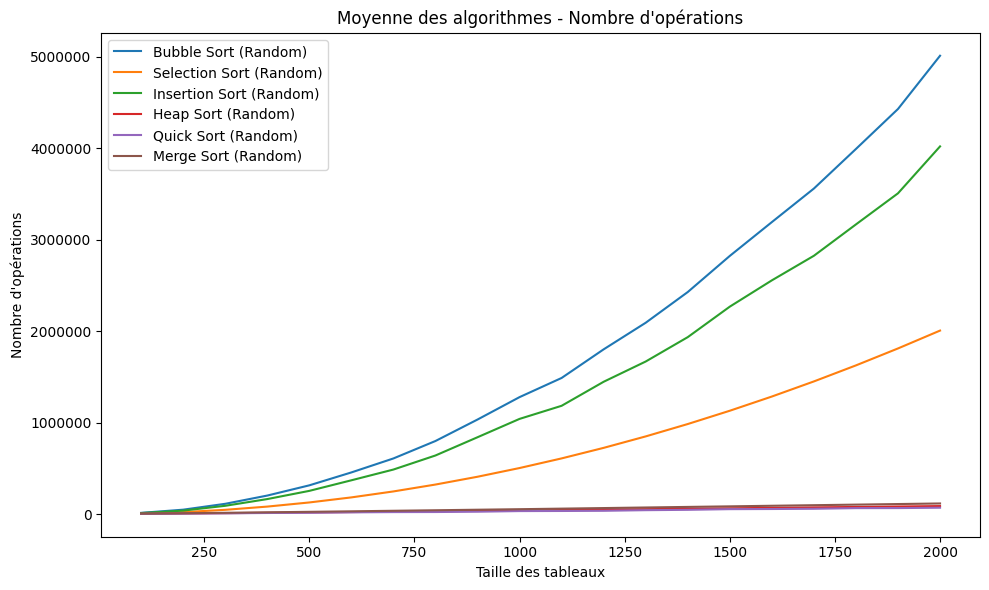

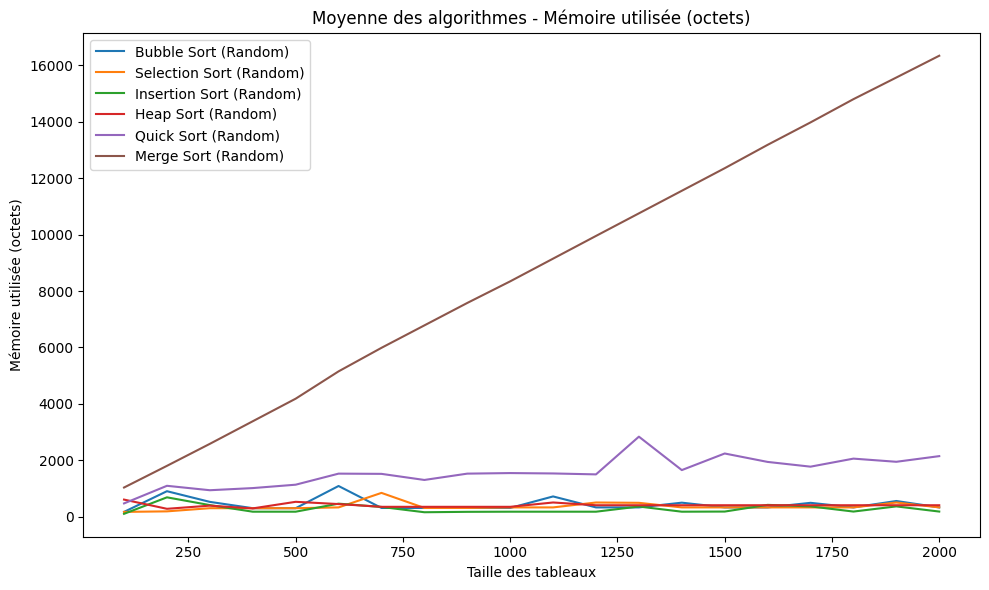

In [2]:
from projet_BEAUJARD_Traian import *

algorithms=[
    BubbleSort(), 
    SelectionSort(), 
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['random'], 
    n_runs=5, 
    show_plots=True)

benchmark.run()

Nous remarquons, d'après les graphiques que :

- Comme prédits : Les algos Bubble Sort, Insertion Sort et Selection Sort s'en sortent très mal avec des complexités temporelles $O(n^2)$.

Pour mieux analyser les autres algorithmes, nous allons refaire un benchmark mais sans le Selection Sort, Bubble Sort, et Insertion Sort.

Benchmark 1 / 5
Exécution de Heap Sort
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 2 / 5
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 3 / 5
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 4 / 5
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort
Benchmark 5 / 5
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


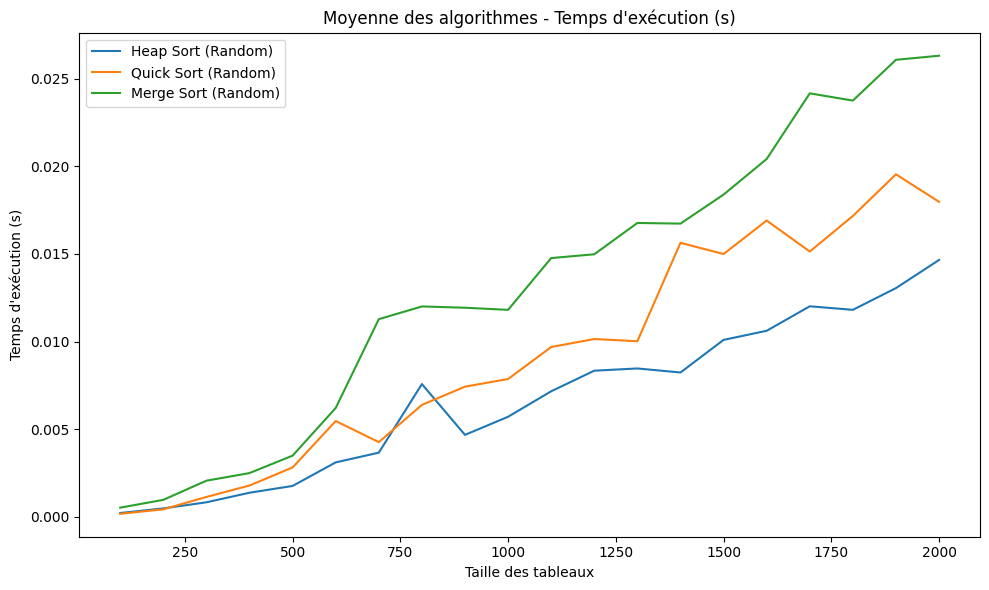

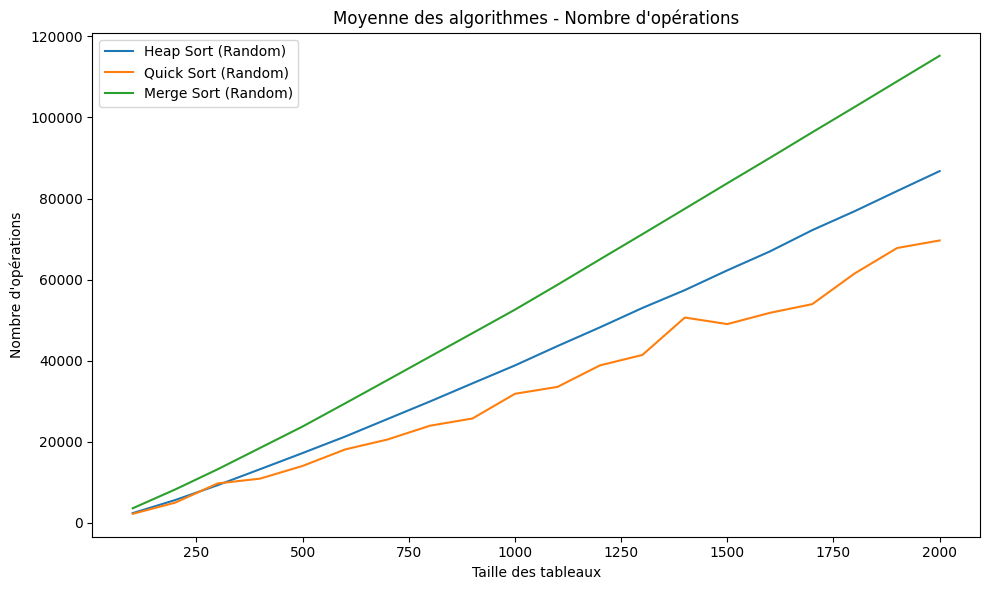

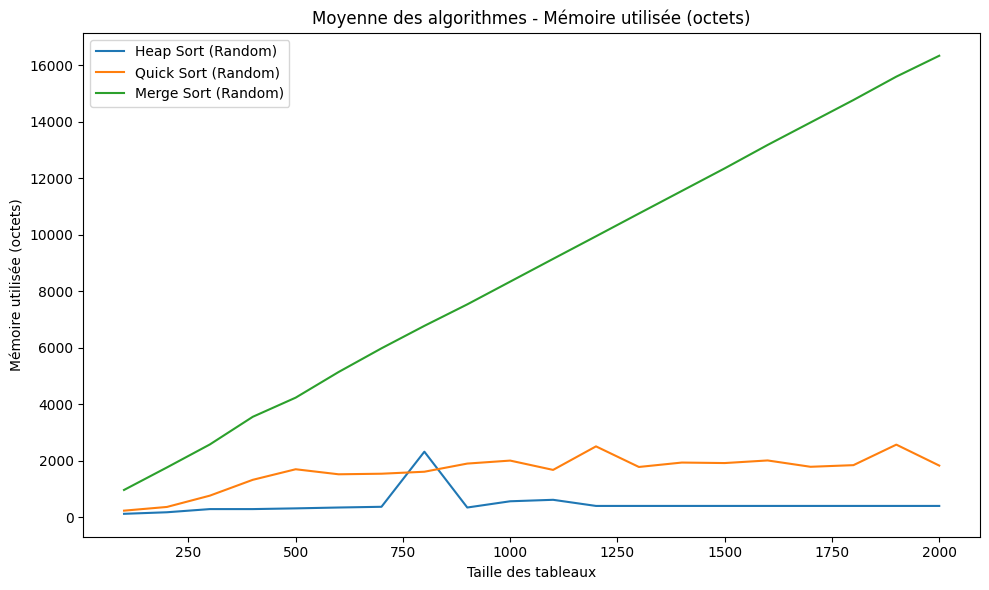

In [3]:
from projet_BEAUJARD_Traian import *

algorithms=[ 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['random'], 
    n_runs=5,
    show_plots=True)

benchmark.run()

- Temps d'exécution :
    - Merge Sort est le plus lent sur les listes aléatoires, même si sa complexité théorique en temps reste en $O(n \log n)$. Le processus de fusion est coûteux et nécessite beaucoup de temps, même si le nombre d'opérations est constant. Sa grande consommation de mémoire affecte également son temps d'exécution.

    - Heap Sort et Quick Sort sont encore les plus performants. Mais Heap Sort, bien qu'il effectue plus d'opérations, reste le plus rapide et le moins utilisateur de mémoire.
 
    - Nombre d'opérations :
    - Merge Sort effectue le plus grand nombre d'opérations sur une liste aléatoire, car il divise la liste en deux et fusionne les sous-listes. Même si la liste est aléatoire, chaque fusion nécessite de comparer tous les éléments. La complexité reste $O(n \log n)$.

    - Heap Sort suit, avec un nombre d'opérations légèrement inférieur à Merge Sort. Il doit construire un tas et réajuster les éléments à chaque extraction, ce qui se fait en $O(n \log n)$. Bien qu'efficace, il nécessite toujours de nombreuses comparaisons pour maintenir la propriété du tas à chaque niveau d'extraction.

    - Quick Sort effectue le moins d'opérations dans le cas des listes aléatoires. Le choix du pivot étant toujours fixé à la moitié du tableau, cela permet de maintenir une répartition relativement équilibrée des sous-listes, ce qui réduit le nombre de comparaisons et d'échanges à chaque niveau de récursion. De ce fait, Quick Sort reste le plus performant en termes de nombre d'opérations dans ce contexte.

- Mémoire utilisée :
    - Merge Sort reste le plus gourmand en mémoire; complexité spatiale de $O(n)$.

    - Quick Sort utilise un espace modéré, avec une complexité spatiale de $O(\log n)$. Cet espace est dû aux appels récursifs, mais comme le pivot est toujours choisi de manière à diviser la liste en deux parties presque égales, cela minimise la profondeur de la récursion et limite l'utilisation mémoire.

    - Heap Sort est le plus économe en mémoire avec une complexité spatiale en $O(1)$, car il trie en place sans nécessiter d'espace supplémentaire.


- Conclusion
    - Merge Sort montre une performance stable avec une complexité en $O(n \log n)$, mais reste toujours désavantagé en raison de sa consommation excessive de mémoire et d'un temps d'exécution plus élevé sur des listes aléatoires.
    - Heap Sort conserve une efficacité solide avec un faible usage de mémoire et un bon compromis entre nombre d'opérations et temps d'exécution. Il reste le plus rapide dans ce contexte, mais il est en avantage par rapport à Quick Sort.  

## Classement des résultats

| Catégorie                | Meilleur algorithme  | Complexité temporelle  | Complexité spatiale  | Raisons principales                              |
|--------------------------|----------------------|------------------------|----------------------|-------------------------------------------------|
| **Listes triées**         | Insertion Sort       | $O(n)$                 | $O(1)$               | Profite au maximum de l'ordre initial            |
| **Listes inversées**      | Heap Sort            | $O(n \log n)$          | $O(1)$               | Stable en temps et espace, ne dépend pas de l'ordre initial |
| **Listes aléatoires**     | Heap Sort / Quick Sort| $O(n \log n)$      | $O(1)$  / $O(n \log n)$        | Performances constantes     |
| **Mémoire utilisée**      | Heap Sort            | $O(n \log n)$          | $O(1)$               | Tri en place, économise de la mémoire            |
| **Temps d'exécution**     | Heap Sort / Quick Sort | $O(n \log n)$      | $O(1)$  / $O(n \log n)$       | Meilleures performances globales en temps d'exécution |
| **Robustesse générale**   | Heap Sort            | $O(n \log n)$          | $O(1)$               | Stable pour toutes les configurations            |
| **Moins d'opérations**   | Quick Sort            | $O(n \log n)$          | $O(n \log n)$               | Rapide et effectue le moins d'opérations pour toutes les configurations            |

### Classement général des algorithmes :

1. **Heap Sort** : Algorithme est le plus robuste. Il est performant sur tous types de listes (triées, inversées, aléatoires) et sa complexité spatiale est faible ($O(1)$).
  
2. **Quick Sort** (avec pivot central) : Très rapide sur les listes aléatoires et triées, avec des performances optimisées ($O(n \log n)$). Cependant, il nécessite un peu plus de mémoire pour la récursion ($O(\log n)$). En optimisant le choix du pivot, il rivalise avec Heap Sort. Il peut même se montrer plus rapide.

3. **Merge Sort** : Stable avec des performances constantes ($O(n \log n)$), mais il utilise beaucoup de mémoire ($O(n)$), ce qui le rend moins pratique pour des listes très grandes.

4. **Insertion Sort** : Excellent sur des listes triées ($O(n)$), mais devient inefficace sur des listes inversées ou aléatoires avec une complexité de $O(n^2)$.

5. **Bubble Sort** : Il reste inefficace sur des listes non triées ou inversées, avec une complexité de $O(n^2)$.

6. **Selection Sort** : Le plus inefficace globalement, avec une complexité constante de $O(n^2)$ quel que soit le type de liste. Il n'exploite pas l'ordre initial des données.

---

### Synthèse :
- **Heap Sort** est le meilleur choix en termes de robustesse et d'utilisation mémoire.
- **Quick Sort** avec un pivot optimisé, il excelle en temps d'exécution sur des listes aléatoires et triées, mais demande plus de mémoire.
- **Insertion Sort** est idéal pour les listes déjà triées, tandis que **Merge Sort** est utile si l'utilisation de mémoire n'est pas un problème.
- **Bubble Sort** et **Selection Sort** sont à éviter pour des listes non triées ou inversées en raison de leur inefficacité.



## Conclusion des résultats

### 1. **Conclusion de la complexité théorique et empirique :**
- Nous avons détaillé théoriquement puis vérifié empiriquement les **complexités théoriques** de chaque algorithme à travers les simulations :
    - Les algorithmes comme **Insertion Sort**, **Bubble Sort** et **Selection Sort** atteignent leur pire cas avec des complexités quadratiques ($O(n^2)$), notamment sur des listes inversées ou aléatoires.
    - En revanche, des algorithmes comme **Heap Sort**, **Quick Sort** et **Merge Sort** montrent des performances constantes en $O(n \log n)$ sur tous les types de listes.

### 2. **Conclusion, meilleur cas, pire cas et cas moyen :**
- **Insertion Sort** se comporte extrêmement bien sur des **listes déjà triées** avec une complexité en $O(n)$. Par contre, sur une liste inversée, il atteint son **pire cas** ($O(n^2)$), où chaque élément doit être déplacé dans une liste déjà pleine.
  
- **Bubble Sort** et **Selection Sort** ne profitent pas d'un ordre déjà établi dans les données, qu’elles soient triées ou inversées. Même avec une version "optimisée" de **Bubble Sort**, la complexité ne descend pas en dessous de $O(n^2)$ dans le cas moyen et le pire cas. 

- **Heap Sort** et **Merge Sort** sont constants dans toutes les configurations (triées, inversées, aléatoires) avec des performances attendues en **$O(n \log n)$**, démontrant leur robustesse. 

- **Quick Sort** est très sensible au choix du pivot. Grâce à l'utilisation d’un **pivot central**, il évite de tomber dans son pire cas ($O(n^2)$), même sur des listes inversées, et maintient des performances constantes en $O(n \log n)$.

### 3. **Analyse des résultats et tendances observées :**
- Sur les **listes triées**, les algorithmes incrémentaux comme **Insertion Sort** et **Bubble Sort** (optimisé) s'en sortent très bien, ce qui confirme l'importance de l'ordre initial des données pour certains algorithmes.
  
- Sur les **listes inversées**, les algorithmes de type **Heap Sort**, **Merge Sort**, et **Quick Sort** (avec pivot central) se sont révélés bien plus performants que les autres. Cela s'explique par le fait que ces algorithmes utilisent des stratégies efficaces de division et de réorganisation, plutôt que de simples comparaisons ou échanges comme dans **Bubble Sort** ou **Selection Sort**.

- Sur les **listes aléatoires**, **Quick Sort** et **Heap Sort** se sont distingués par leur rapidité.

### 4. **Comparaison claire des forces et faiblesses des algorithmes :**
- **Insertion Sort** est **idéale pour des petites listes** ou des listes presque triées, mais devient inefficace pour des données plus complexes.
  
- **Bubble Sort** (optimisé) ne tire pas assez profit de l'optimisation sur des listes non triées et reste peu performant dans les cas où l'ordre des éléments est totalement aléatoire ou inversé.

- **Selection Sort** est globalement le plus inefficace de tous, car il effectue le même nombre d’opérations indépendamment de l'ordre initial des données.

- **Heap Sort** est un algorithme très stable, avec un faible besoin en mémoire et une efficacité constante dans toutes les situations, ce qui le rend intéressant pour des cas d'usage où la mémoire disponible est limitée.

- **Quick Sort** est particulièrement performant avec un pivot bien choisi. Cependant, si le pivot est mal choisi, il peut rapidement devenir moins performant. Malgré cela, son efficacité sur des listes aléatoires et triées en fait un excellent choix général.

- **Merge Sort** offre des performances constantes en temps mais consomme beaucoup de mémoire, ce qui le rend moins approprié pour des environnements où l’espace mémoire est limité.

### Conclusion des conclusions :
- Les simulations ont confirmé les complexités théoriques de chaque algorithme, et l'influence de l'ordre des listes est cruciale pour certains algorithmes (Insertion Sort, Bubble Sort). 
- Des algorithmes comme **Heap Sort** et **Merge Sort** sont beaucoup plus robustes, et leur performance n'est pas affectée par l'ordre des éléments dans la liste.
- **Quick Sort**, avec un pivot central, est extrêmement performant pour des listes aléatoires, confirmant que le choix du pivot est un facteur déterminant dans l'efficacité de cet algorithme.


# IV/Bonnes pratiques

Afin de faciliter le choix de l'algorithme le plus optimisé, j'ai résumé dans un tableau les algorithmes recommandés ainsi que ceux à éviter pour différents scénarios courants.

| Scénario                                                 | Algorithme recommandé        | Raisons principales                                                                                                                                     | À éviter                                                                 |
|----------------------------------------------------------|------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Petites listes ou listes presque triées**              | **Insertion Sort**            | Performant en $O(n)$ pour les listes triées, faible surcoût sur des petites tailles                                                                     | Éviter sur des listes inversées ou très désordonnées ($O(n^2)$)          |
| **Grandes listes (triées, inversées ou aléatoires)**      | **Heap Sort** ou **Quick Sort** | Heap Sort : $O(n \log n)$ stable en temps et mémoire $O(1)$, Quick Sort rapide en temps avec pivot central $O(n \log n)$ | Bubble Sort et Selection Sort ($O(n^2)$ dans tous les cas)              |
| **Listes à trier avec mémoire limitée**                  | **Heap Sort**                 | Trie en place avec une complexité spatiale de $O(1)$, sans nécessiter d'espace supplémentaire                                                           | Merge Sort (nécessite $O(n)$ en mémoire supplémentaire pour les fusions) |
| **Listes aléatoires**                                    | **Quick Sort (pivot central)**| Très performant en temps sur des listes non ordonnées, complexité stable en $O(n \log n)$ grâce au pivot central                                         | Insertion Sort, Bubble Sort, Selection Sort ($O(n^2)$ pour des listes non triées) |
| **Listes nécessitant une stabilité dans le tri** | **Merge Sort**                | Stable avec complexité en $O(n \log n)$ et stable (conserve l'ordre relatif des éléments égaux)                                                           | Heap Sort, Quick Sort (ne sont pas stables)                             |
| **Listes déjà triées**                                   | **Insertion Sort**            | Complexité linéaire $O(n)$ sur des listes triées                                                                                                        | Bubble Sort et Selection Sort, même optimisés, ne profitent pas de l'ordre : $O(n^2)$ |

